In [1]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt

## Preamble and Datasets

### step1: Data set from the features selection in R

In [2]:
data = pd.read_csv("fromR_datatidy_with_y.csv")

In [3]:
data.head()

,a_base,a_nBr,a_nP,BCUT_PEOE_1,chiral_u,E_ang,E_ele,E_oop,E_strain,E_vdw,...,vsurf_DD12,vsurf_DD13,vsurf_DD23,vsurf_DW23,vsurf_EDmin1,vsurf_HL2,vsurf_ID8,vsurf_R,vsurf_Wp3,Ratios_ln
0,0,0,0,-0.509120,4,15.200221,-20.888254,-10.511291,0.052266,14.732253,...,0.500000,0.707107,0.500000,0.500000,-2.820224,0.106068,2.906347,1.610714,191.625,-2.04
1,0,0,0,-0.681715,0,4.210898,8.896742,0.003653,0.009940,7.784770,...,1.224745,1.118034,2.291288,2.291288,-2.825117,0.000000,0.149624,1.467669,53.750,-1.90
2,0,0,0,-0.631661,7,247.339600,9.240073,0.117704,0.001889,9.151984,...,0.707107,0.500000,1.118034,0.500000,-2.679957,0.003455,1.081883,1.521332,19.000,-1.86
3,0,0,0,-0.667396,0,4.074647,8.238770,0.004214,0.003370,7.387527,...,5.000000,4.609772,0.500000,0.500000,-2.566389,0.000000,0.131177,1.429877,41.375,-1.83
4,0,6,0,-0.665789,0,7.938366,-0.179276,0.017198,0.005543,10.747043,...,3.605551,4.949748,1.870829,3.240370,-2.971044,0.000000,0.147687,1.447858,88.250,-1.70


In [4]:
y = data["Ratios_ln"]
y

0    -2.04
1    -1.90
2    -1.86
3    -1.83
4    -1.70
      ... 
78    0.41
79    0.51
80    0.69
81    0.69
82    0.86
Name: Ratios_ln, Length: 83, dtype: float64

In [5]:
x = data.drop(['Ratios_ln'], axis =1)
x.head()

,a_base,a_nBr,a_nP,BCUT_PEOE_1,chiral_u,E_ang,E_ele,E_oop,E_strain,E_vdw,...,vsurf_CP,vsurf_DD12,vsurf_DD13,vsurf_DD23,vsurf_DW23,vsurf_EDmin1,vsurf_HL2,vsurf_ID8,vsurf_R,vsurf_Wp3
0,0,0,0,-0.509120,4,15.200221,-20.888254,-10.511291,0.052266,14.732253,...,0.069198,0.500000,0.707107,0.500000,0.500000,-2.820224,0.106068,2.906347,1.610714,191.625
1,0,0,0,-0.681715,0,4.210898,8.896742,0.003653,0.009940,7.784770,...,0.000000,1.224745,1.118034,2.291288,2.291288,-2.825117,0.000000,0.149624,1.467669,53.750
2,0,0,0,-0.631661,7,247.339600,9.240073,0.117704,0.001889,9.151984,...,0.806815,0.707107,0.500000,1.118034,0.500000,-2.679957,0.003455,1.081883,1.521332,19.000
3,0,0,0,-0.667396,0,4.074647,8.238770,0.004214,0.003370,7.387527,...,0.000000,5.000000,4.609772,0.500000,0.500000,-2.566389,0.000000,0.131177,1.429877,41.375
4,0,6,0,-0.665789,0,7.938366,-0.179276,0.017198,0.005543,10.747043,...,184.569640,3.605551,4.949748,1.870829,3.240370,-2.971044,0.000000,0.147687,1.447858,88.250


In [6]:
x.describe()

,a_base,a_nBr,a_nP,BCUT_PEOE_1,chiral_u,E_ang,E_ele,E_oop,E_strain,E_vdw,...,vsurf_CP,vsurf_DD12,vsurf_DD13,vsurf_DD23,vsurf_DW23,vsurf_EDmin1,vsurf_HL2,vsurf_ID8,vsurf_R,vsurf_Wp3
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,0.012048,0.638554,0.012048,-0.597359,0.506024,18.468640,5.427044,-0.127157,0.241184,10.668765,...,38.278169,2.684333,2.287387,2.604934,2.182716,-2.458083,0.202403,1.280949,1.413931,40.545181
std,0.109764,1.798226,0.109764,0.109438,1.610738,36.084541,22.257512,1.252843,1.343791,6.657401,...,297.429855,2.839576,2.656061,2.626758,2.331040,0.396446,0.647756,2.448706,0.068609,38.536497
min,0.000000,0.000000,0.000000,-0.736198,0.000000,2.046489,-69.588249,-10.511291,0.000149,2.350585,...,0.000000,0.500000,0.500000,0.500000,0.500000,-3.180073,0.000000,0.000000,1.255820,0.000000
25%,0.000000,0.000000,0.000000,-0.667604,0.000000,3.873536,-1.117158,0.000193,0.002564,6.657501,...,0.000000,0.500000,0.500000,0.500000,0.707107,-2.733315,0.000000,0.179724,1.364125,8.312500
50%,0.000000,0.000000,0.000000,-0.641094,0.000000,6.654265,4.444562,0.003653,0.003718,8.197741,...,0.014314,0.866025,0.866025,1.000000,0.866025,-2.539517,0.000000,0.368134,1.416062,34.750000
75%,0.000000,0.000000,0.000000,-0.543808,0.000000,15.748760,10.590412,0.018872,0.006882,11.595728,...,0.357963,5.790028,3.468502,5.936574,3.240370,-2.246840,0.026871,1.010980,1.449686,56.250000
max,1.000000,10.000000,1.000000,-0.237393,7.000000,247.339600,62.097404,2.125439,11.121651,35.310619,...,2703.358400,12.216792,12.509996,8.062258,8.500000,-1.312712,4.037037,10.400722,1.610714,191.625000


# Exploratory Data

<AxesSubplot:>

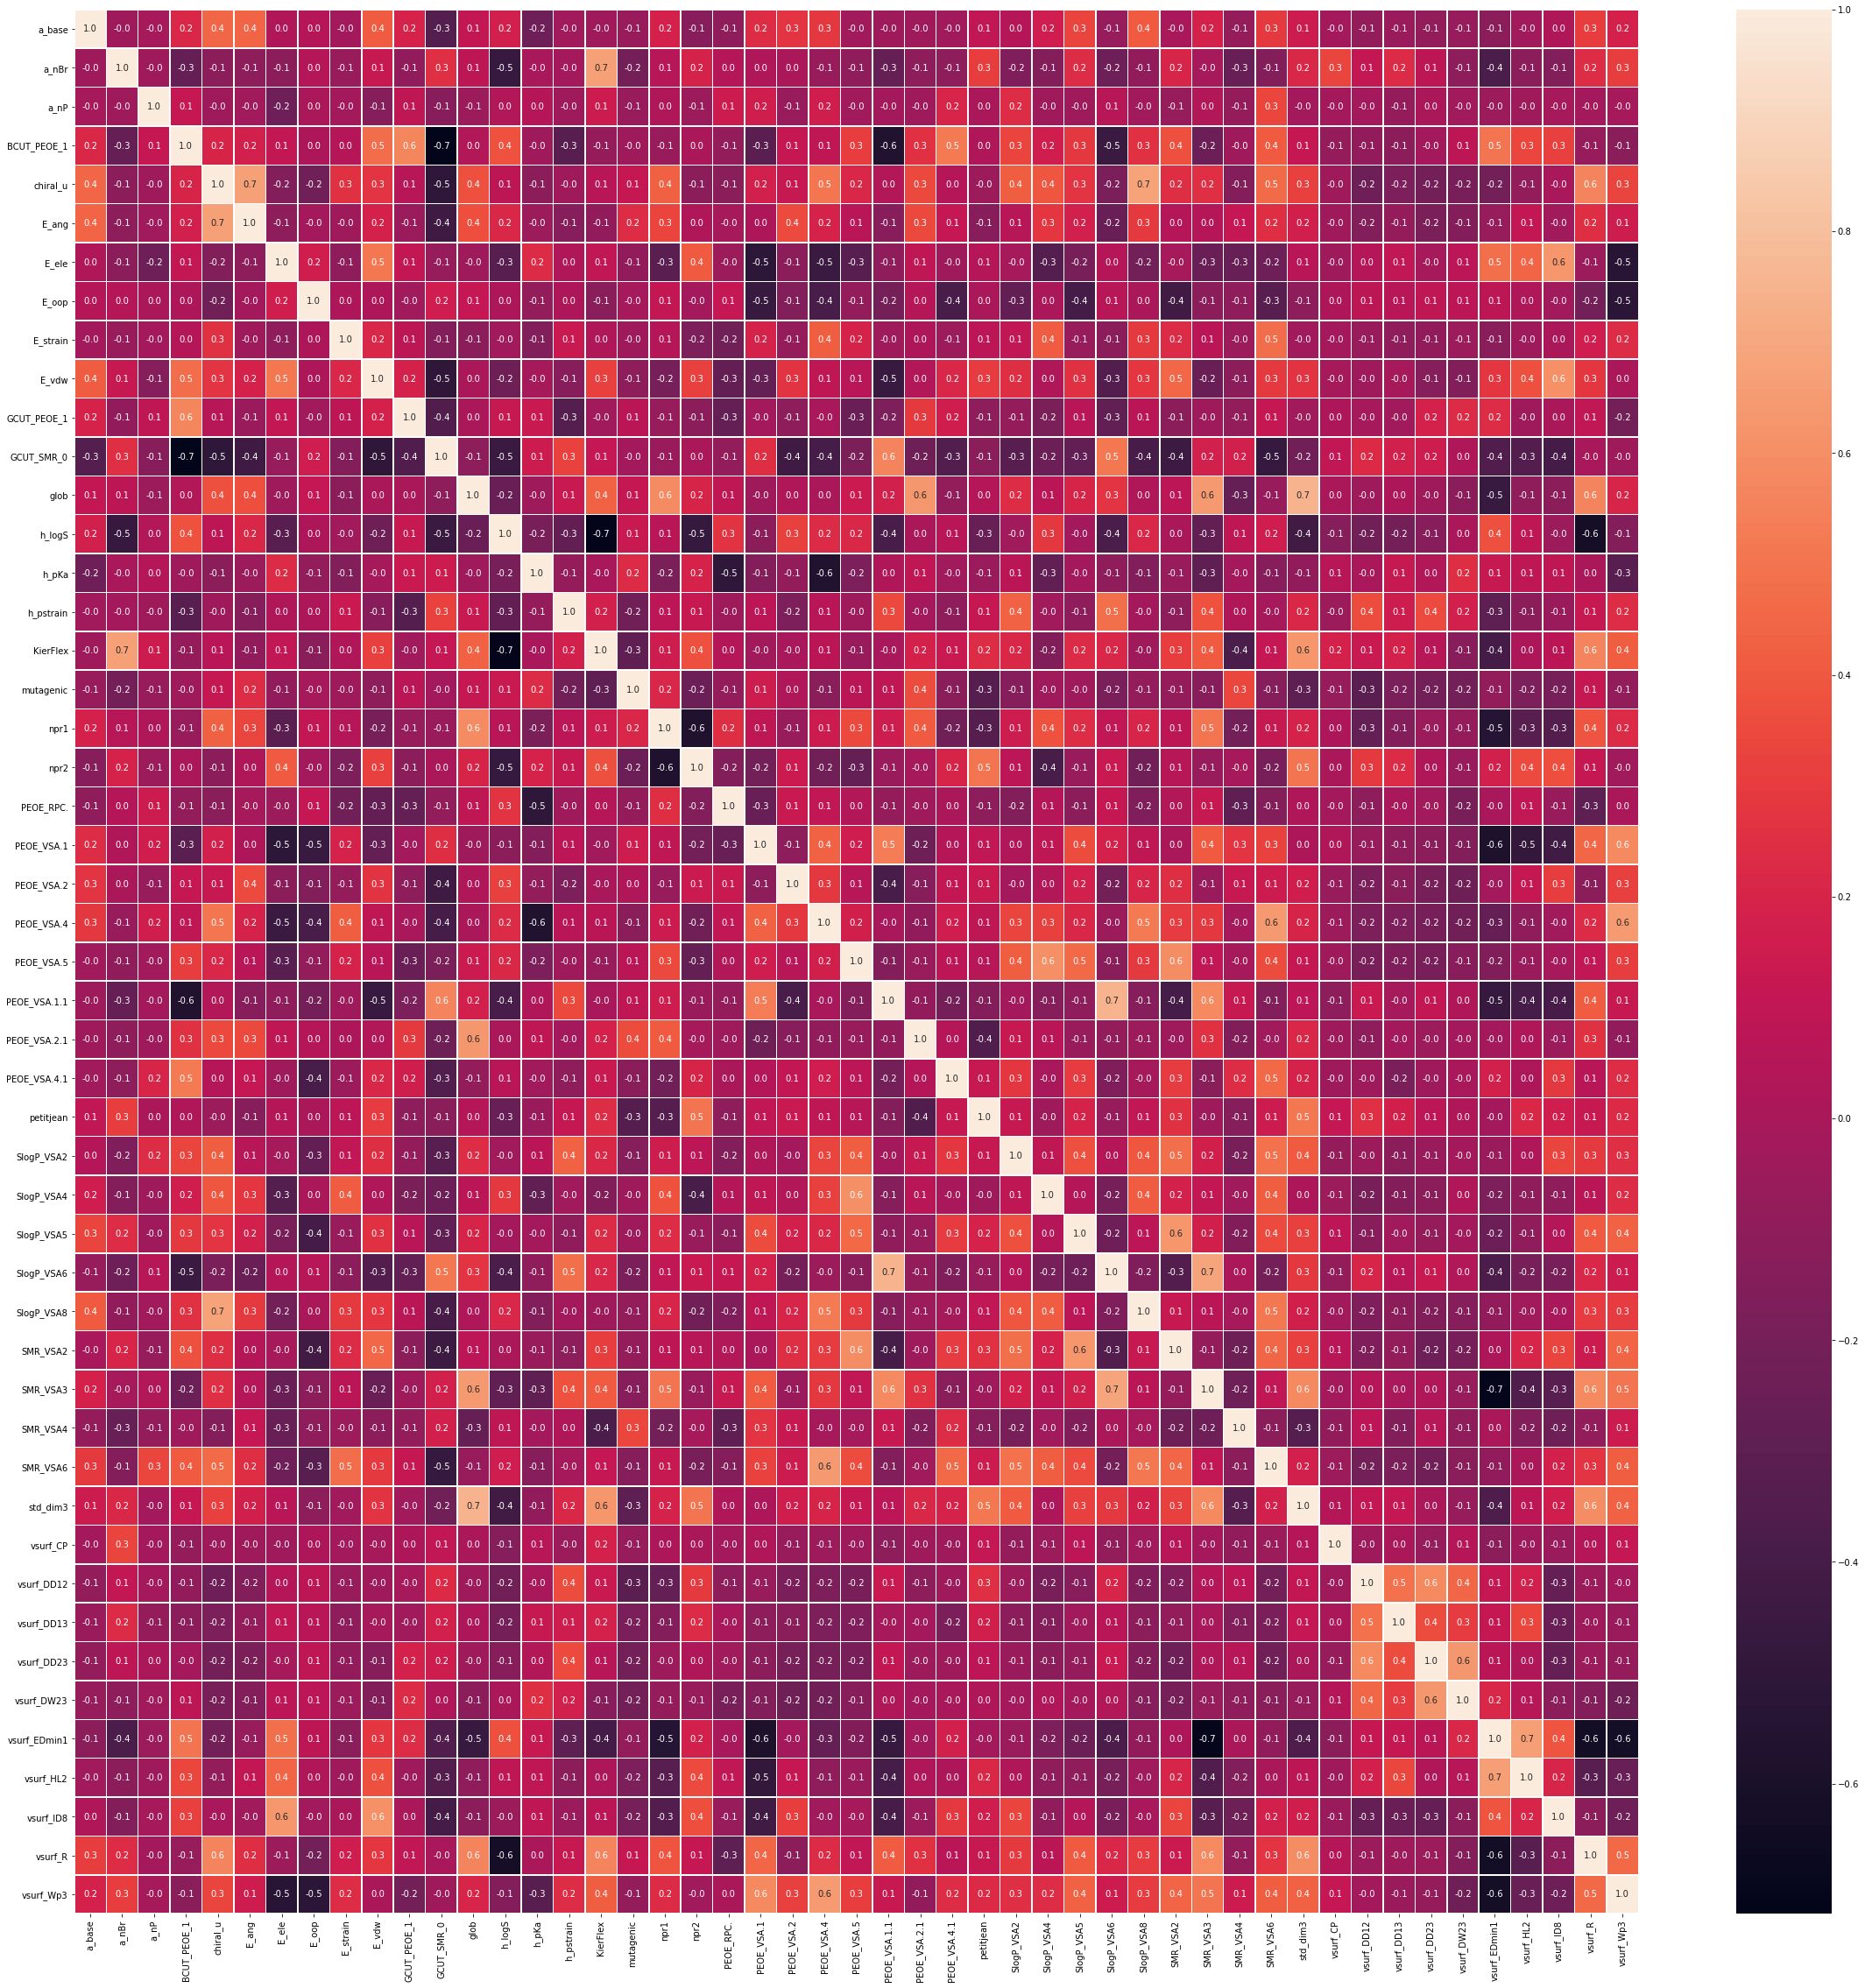

In [7]:
%matplotlib inline
f, ax = plt.subplots(figsize = (40, 40))
sns.heatmap(x.corr(), annot = True, linewidth = 0.5, fmt =".1f", ax=ax)

## Seperate data set by columns for visualization 7*7

In [8]:
x.shape

(83, 49)

In [9]:
view01 = x.iloc[:,0:7]
view01.head()

,a_base,a_nBr,a_nP,BCUT_PEOE_1,chiral_u,E_ang,E_ele
0,0,0,0,-0.509120,4,15.200221,-20.888254
1,0,0,0,-0.681715,0,4.210898,8.896742
2,0,0,0,-0.631661,7,247.339600,9.240073
3,0,0,0,-0.667396,0,4.074647,8.238770
4,0,6,0,-0.665789,0,7.938366,-0.179276


In [10]:
view02 = x.iloc[:,7:14]
view02.head()

,E_oop,E_strain,E_vdw,GCUT_PEOE_1,GCUT_SMR_0,glob,h_logS
0,-10.511291,0.052266,14.732253,-0.390012,-0.533022,0.099816,-7.301610
1,0.003653,0.009940,7.784770,-0.412443,-0.382846,0.160938,-8.090596
2,0.117704,0.001889,9.151984,-0.420168,-0.522796,0.389412,-6.204517
3,0.004214,0.003370,7.387527,-0.411549,-0.386031,0.104565,-6.721433
4,0.017198,0.005543,10.747043,-0.398754,-0.400173,0.110883,-8.511435


In [14]:
view03 = x.iloc[:,14:21]
view04 = x.iloc[:,21:28]
view05 = x.iloc[:,28:35]
view06 = x.iloc[:,35:42]
view07 = x.iloc[:,42:49]

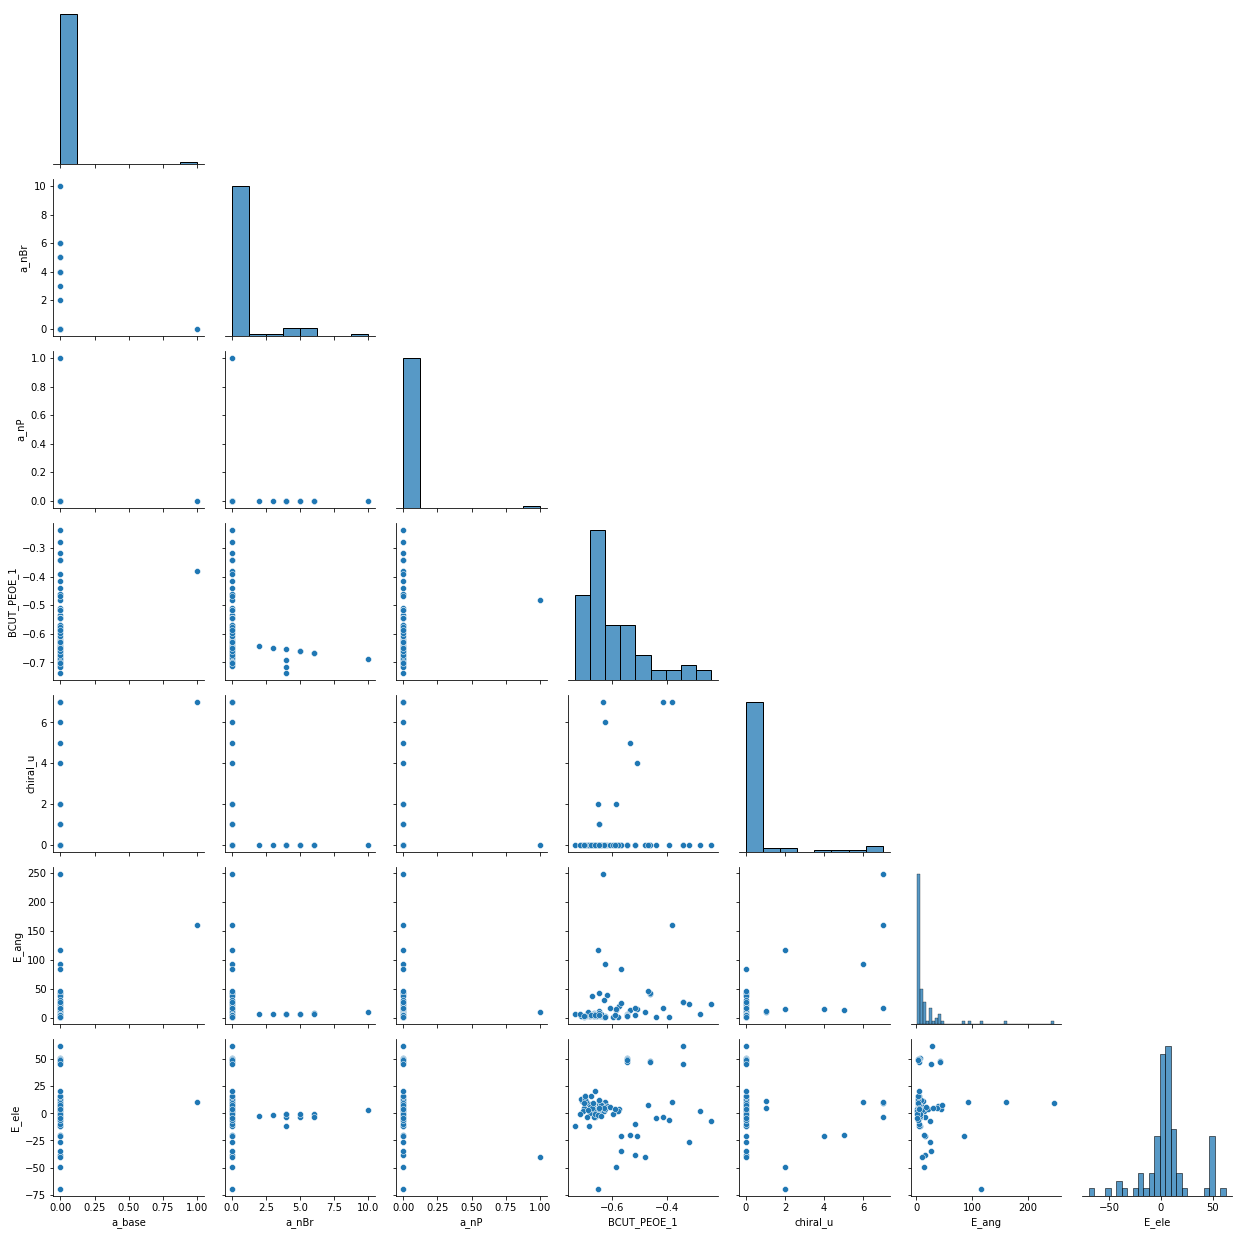

In [11]:
g = sns.PairGrid(view01,diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

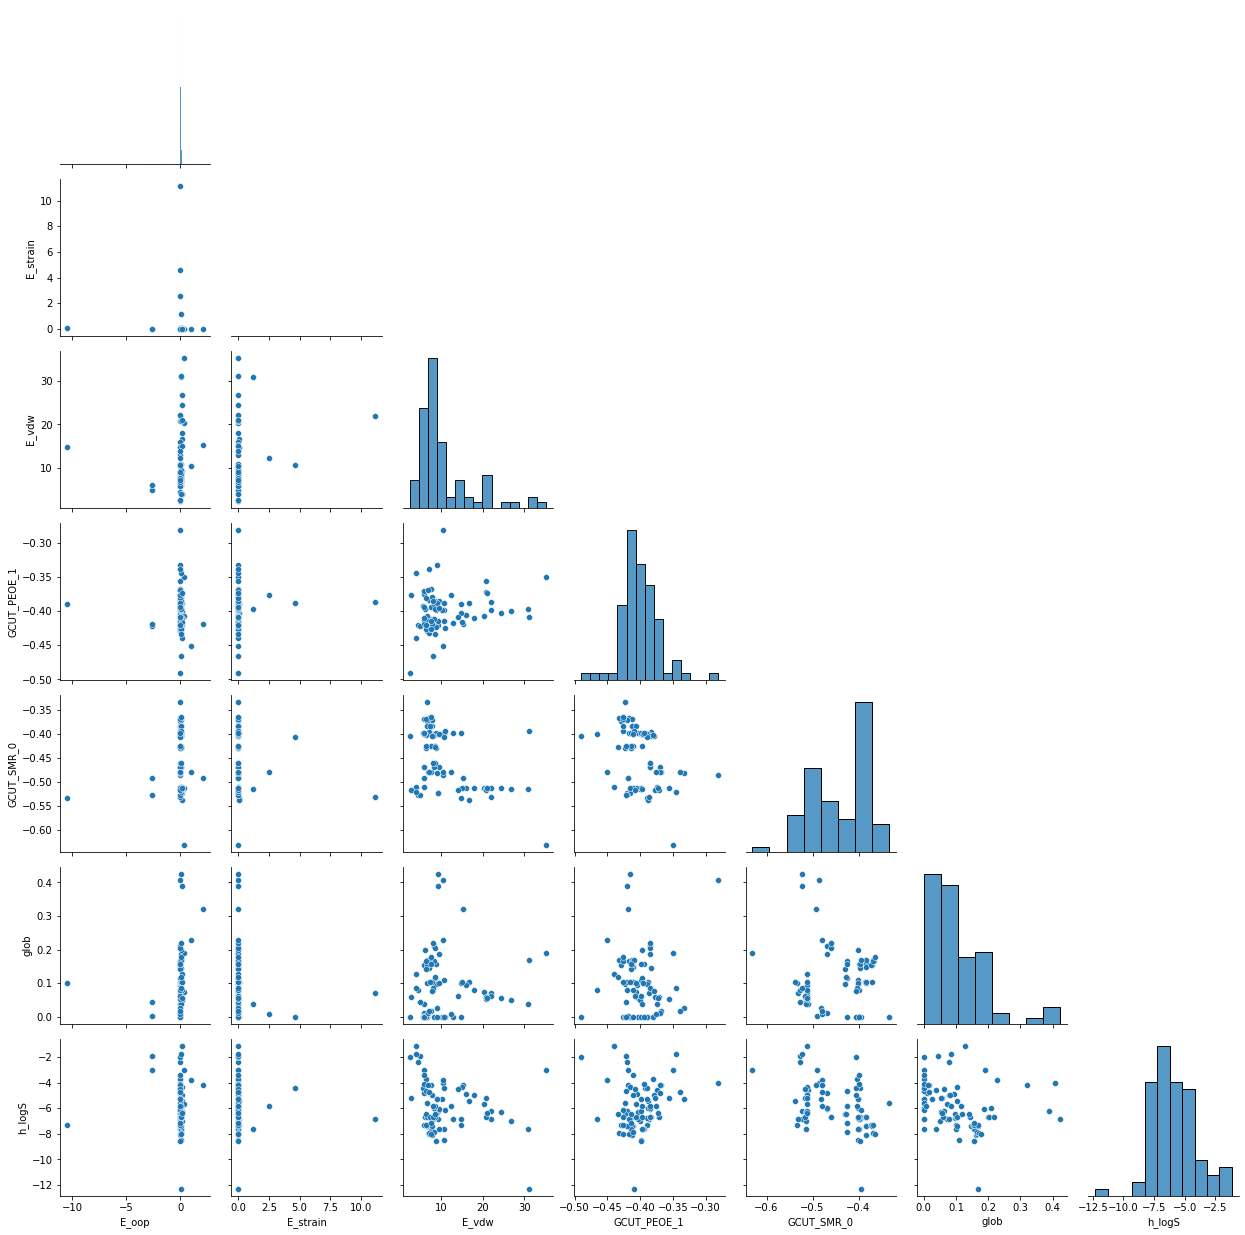

In [12]:
g = sns.PairGrid(view02,diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

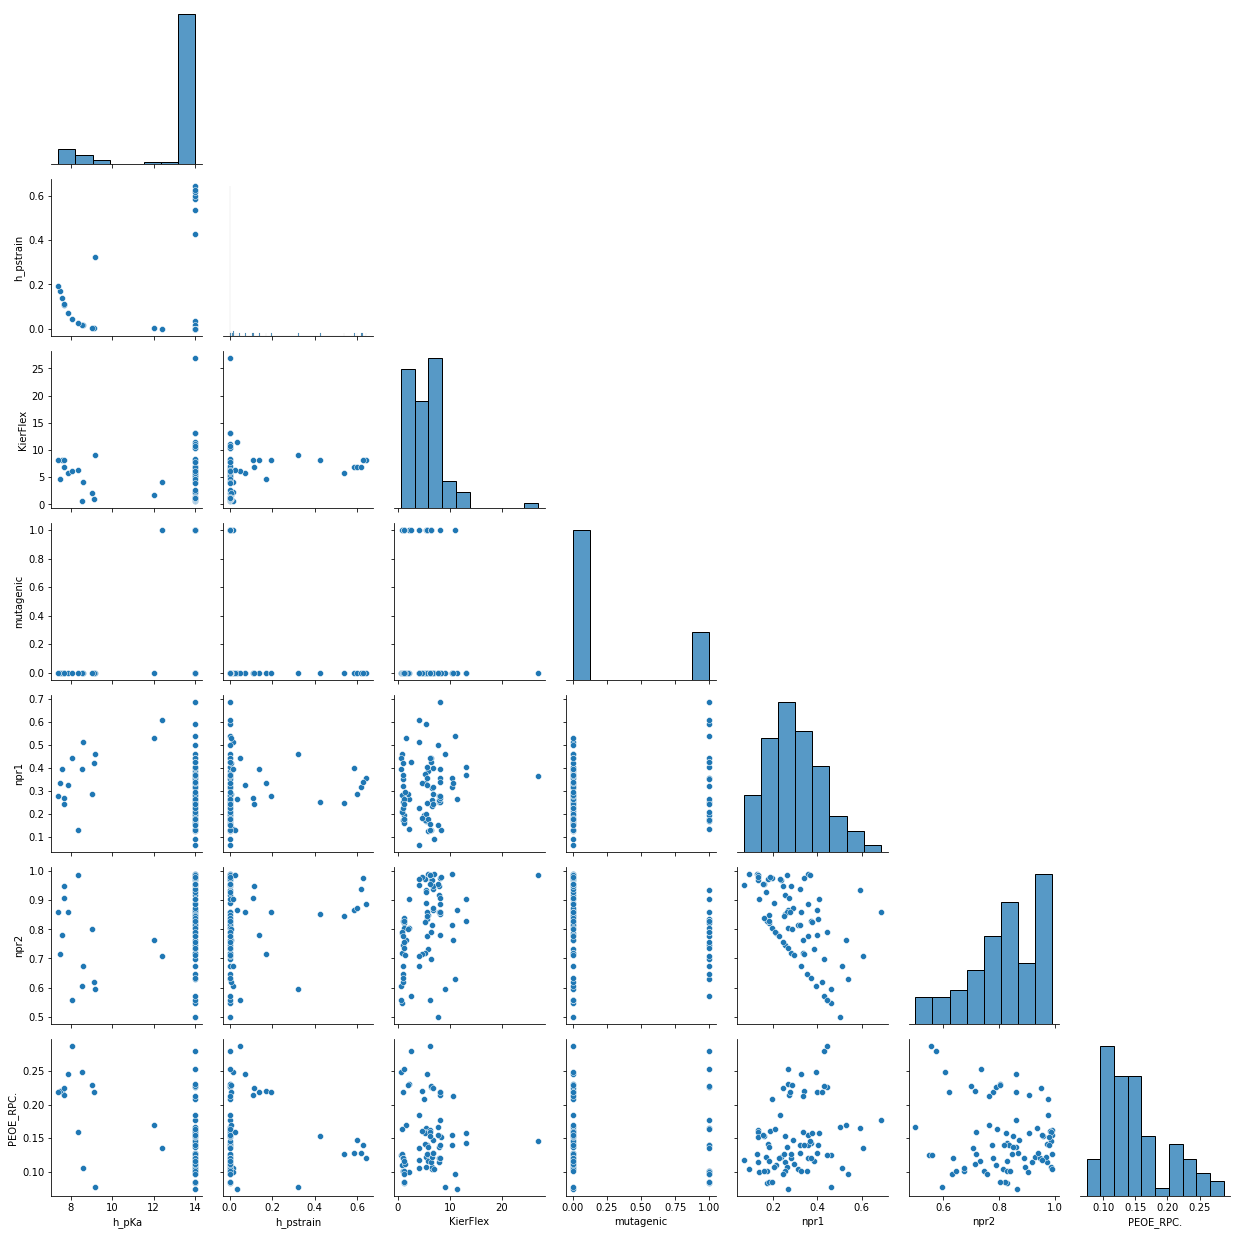

In [15]:
g = sns.PairGrid(view03,diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

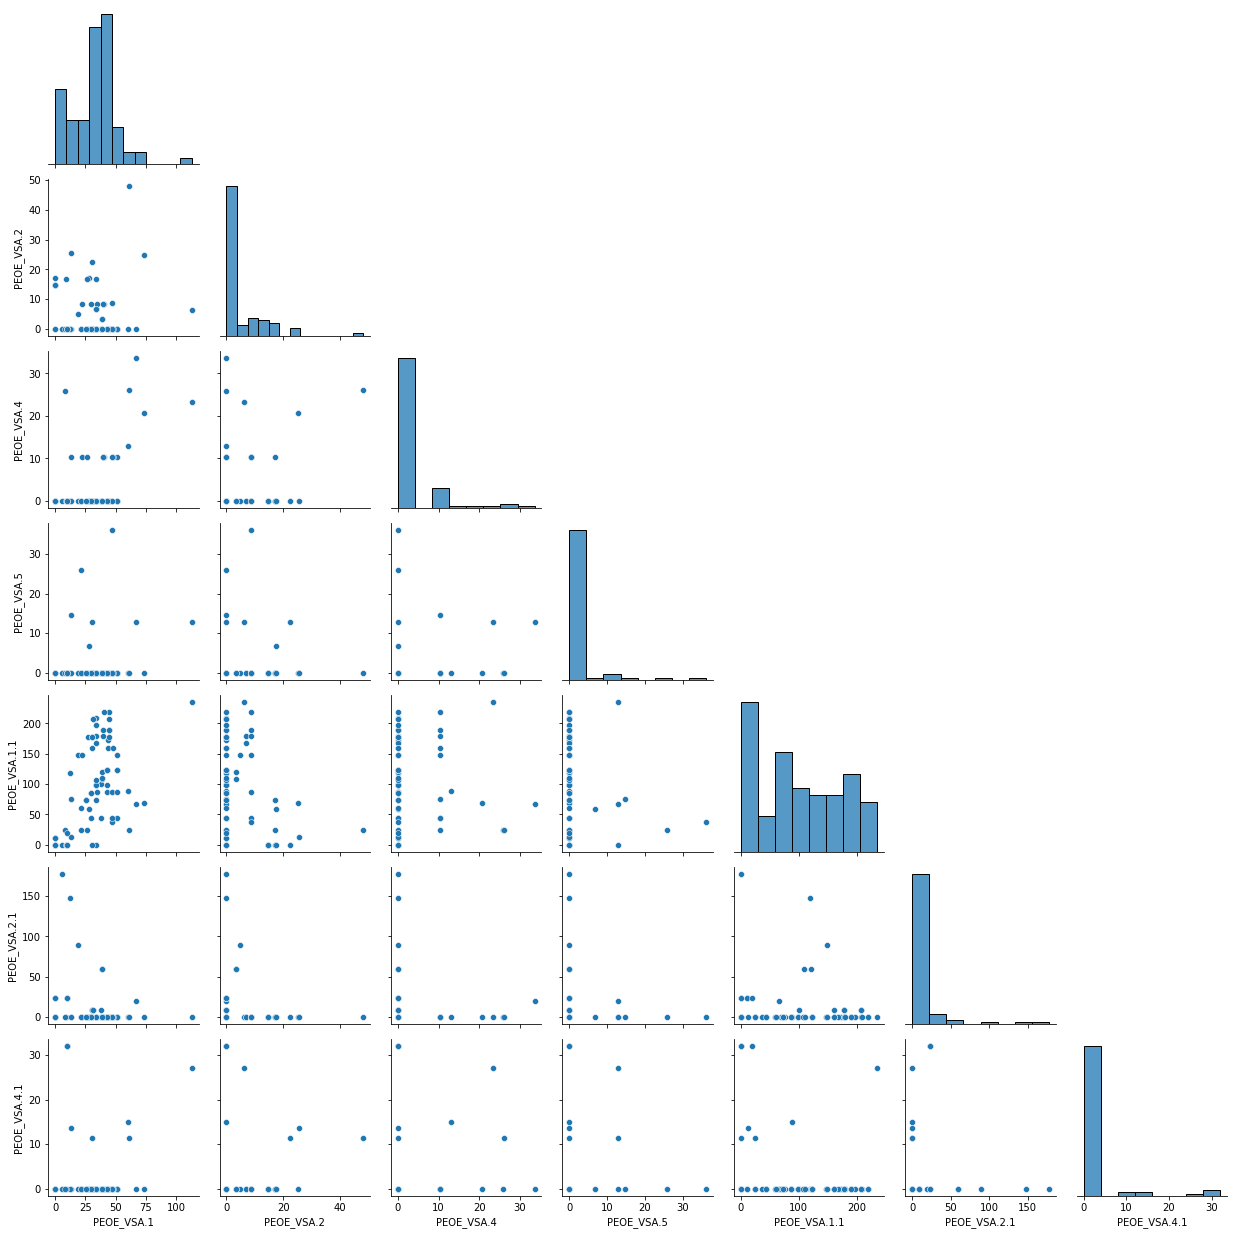

In [16]:
g = sns.PairGrid(view04,diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

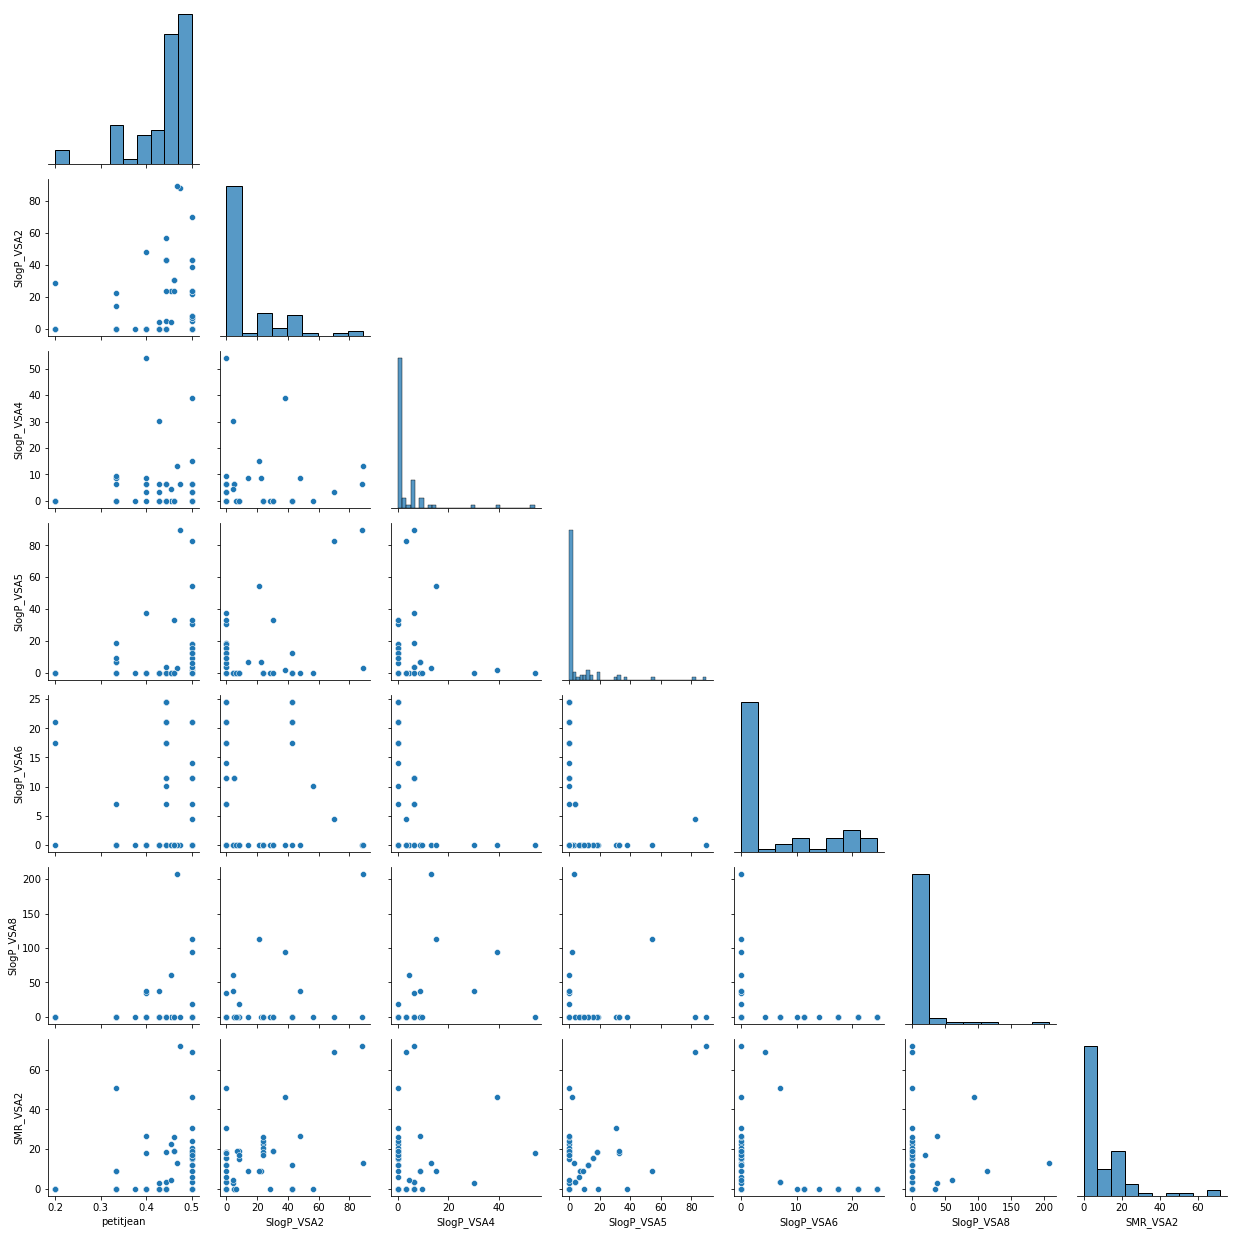

In [17]:
g = sns.PairGrid(view05,diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

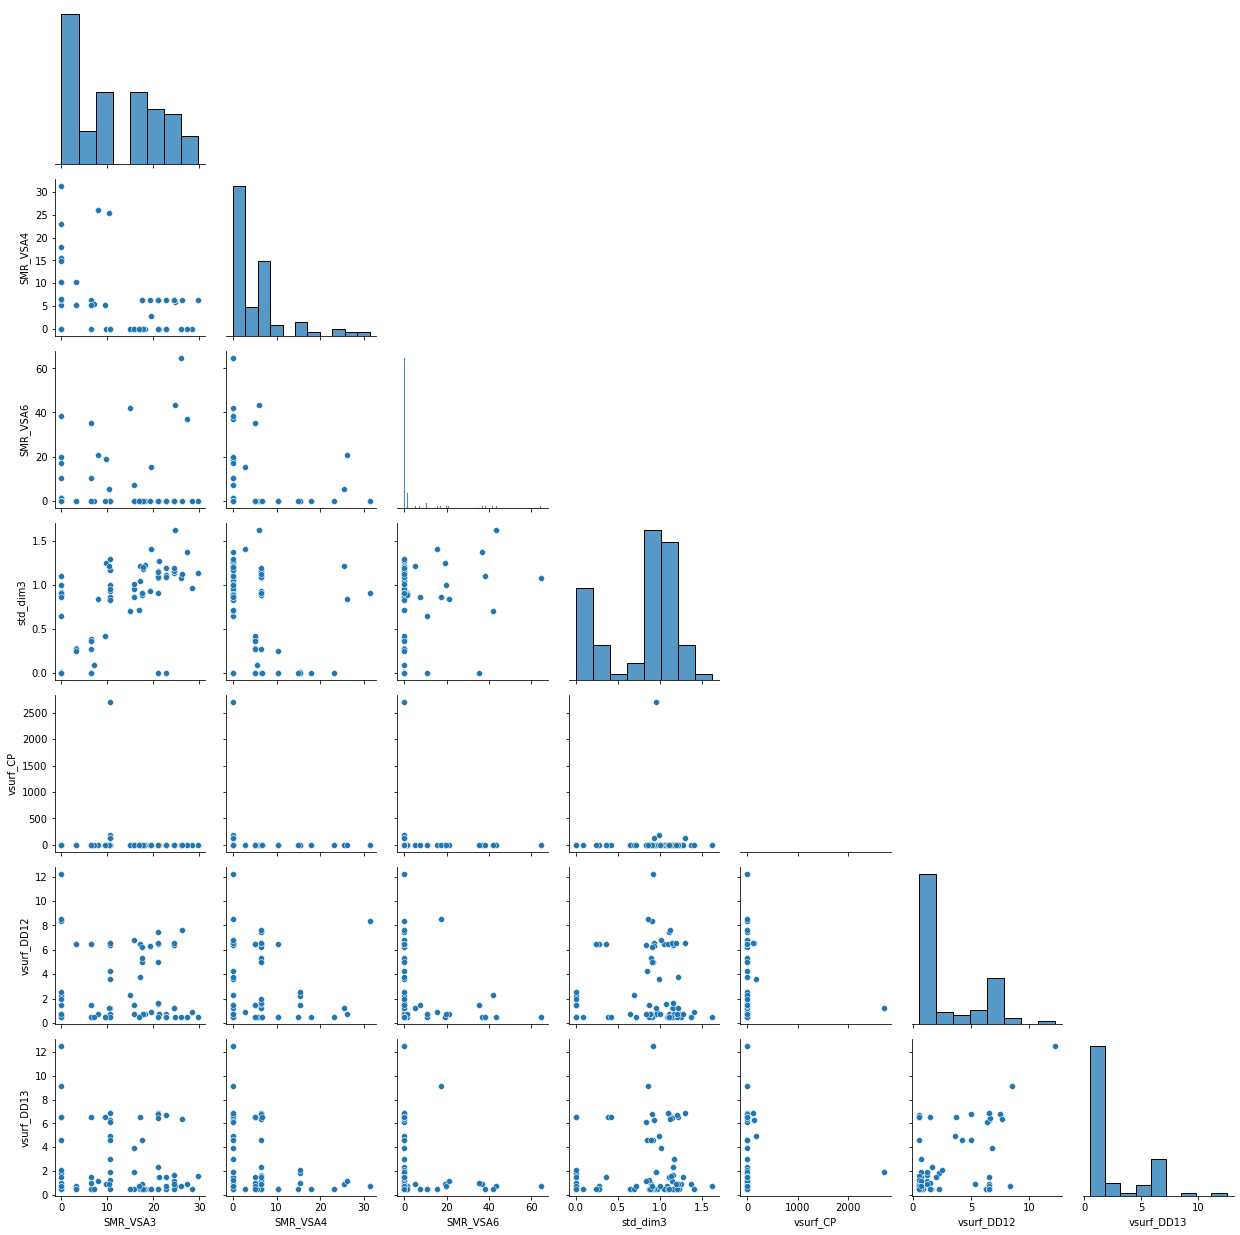

In [18]:
g = sns.PairGrid(view06,diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

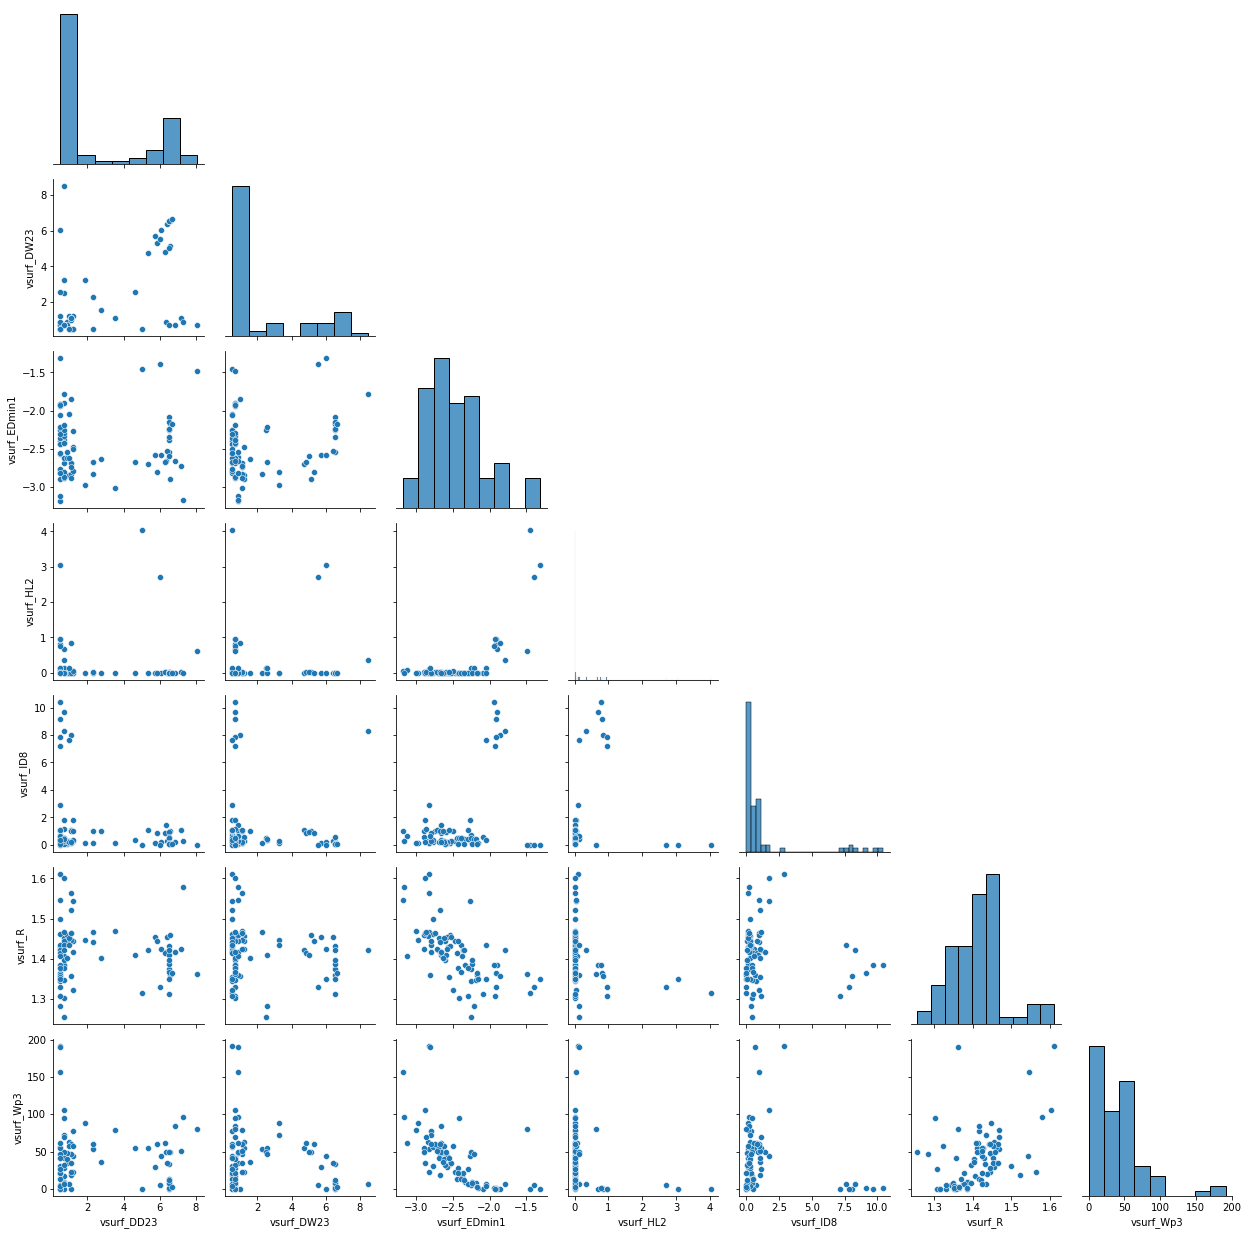

In [19]:
g = sns.PairGrid(view07,diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

## JointPlot

In [20]:
# Setting seaborn as default style even if use only matplotlib
sns.set()

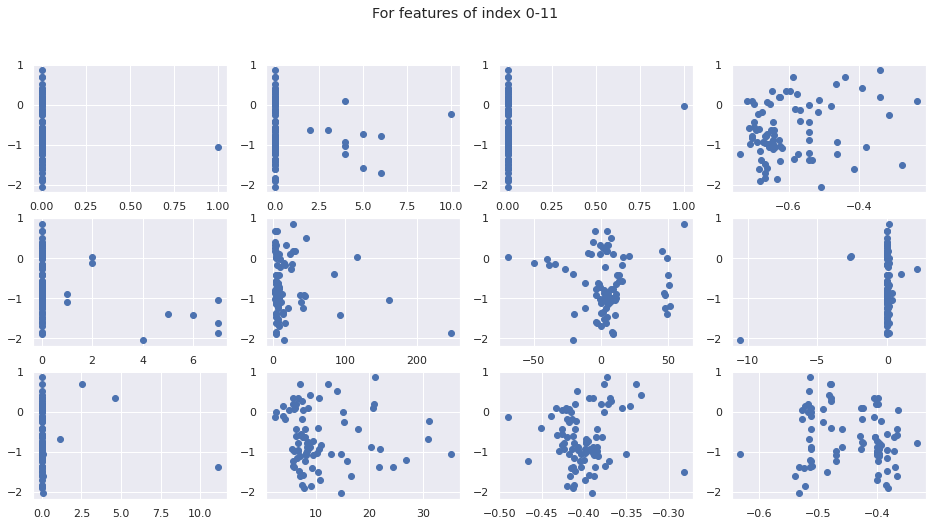

In [21]:
fig, axes = plt.subplots(3, 4, figsize=(16,8))
fig.suptitle('For features of index 0-11')
axes_list = [axes[0][0],axes[0][1],axes[0][2],axes[0][3],
             axes[1][0],axes[1][1],axes[1][2],axes[1][3],
            axes[2][0],axes[2][1],axes[2][2],axes[2][3]]
for i in range(12):
    axes_list[i].scatter(x.iloc[:,i],y)


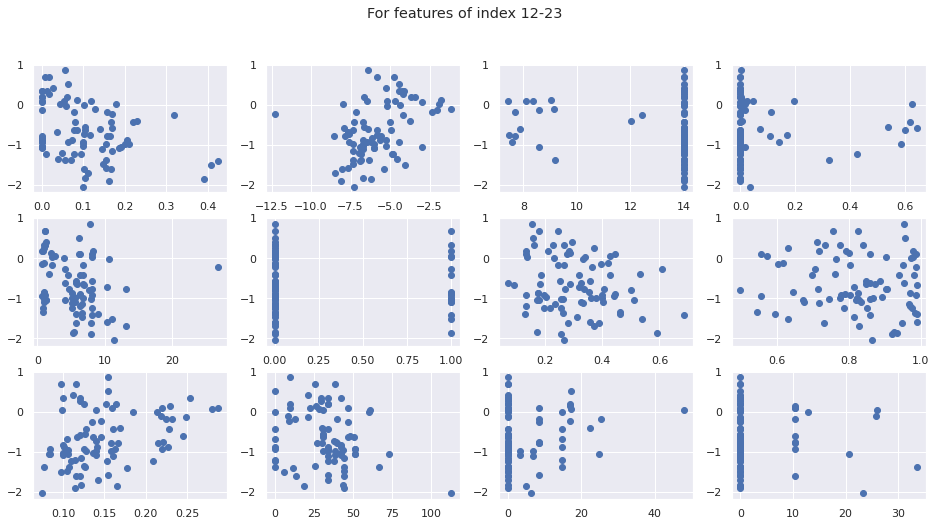

In [22]:
fig, axes = plt.subplots(3, 4, figsize=(16,8))
fig.suptitle('For features of index 12-23')
axes_list = [axes[0][0],axes[0][1],axes[0][2],axes[0][3],
             axes[1][0],axes[1][1],axes[1][2],axes[1][3],
            axes[2][0],axes[2][1],axes[2][2],axes[2][3]]
for i in range(12):
    axes_list[i].scatter(x.iloc[:,i+12],y)


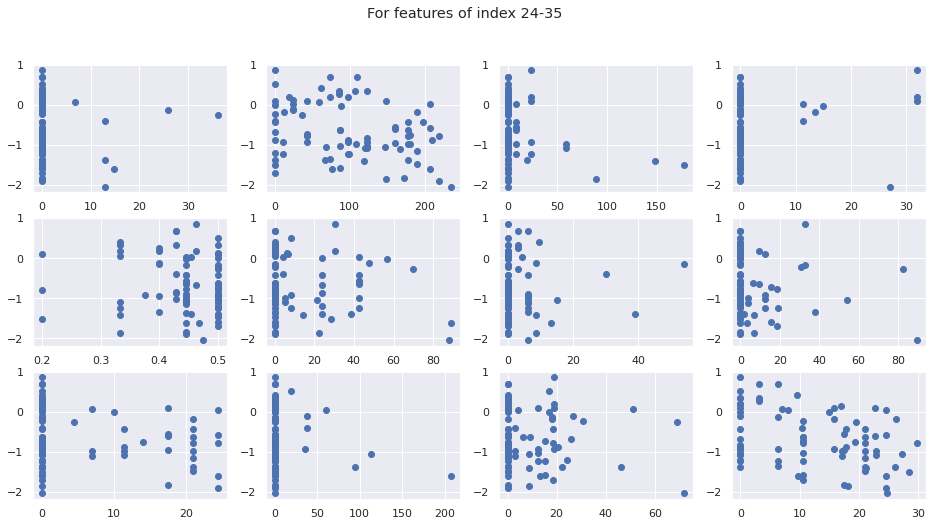

In [23]:
fig, axes = plt.subplots(3, 4, figsize=(16,8))
fig.suptitle('For features of index 24-35')
axes_list = [axes[0][0],axes[0][1],axes[0][2],axes[0][3],
             axes[1][0],axes[1][1],axes[1][2],axes[1][3],
            axes[2][0],axes[2][1],axes[2][2],axes[2][3]]
for i in range(12):
    axes_list[i].scatter(x.iloc[:,i+24],y)

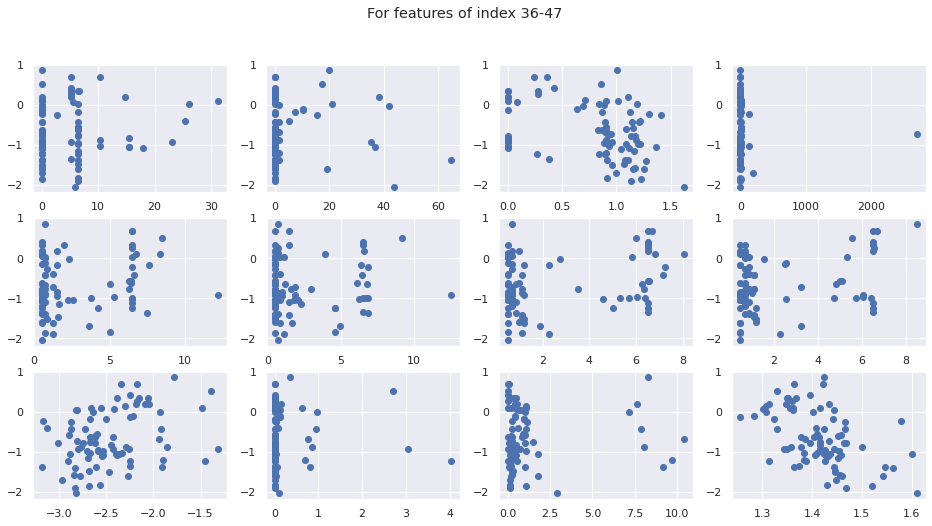

In [24]:
fig, axes = plt.subplots(3, 4, figsize=(16,8))
fig.suptitle('For features of index 36-47')
axes_list = [axes[0][0],axes[0][1],axes[0][2],axes[0][3],
             axes[1][0],axes[1][1],axes[1][2],axes[1][3],
            axes[2][0],axes[2][1],axes[2][2],axes[2][3]]
for i in range(12):
    axes_list[i].scatter(x.iloc[:,i+36],y)

0     191.625
1      53.750
2      19.000
3      41.375
4      88.250
       ...   
78      7.375
79      4.875
80     12.375
81      3.000
82      6.500
Name: vsurf_Wp3, Length: 83, dtype: float64

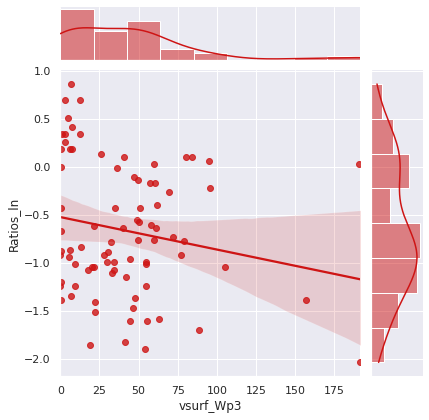

In [30]:
sns.jointplot(x.iloc[:,48],
              y,
              kind="reg",
              color="#ce1414")

## step 2 : Drop variables that have a very low correlation with the target

In [7]:
feature_drop = x.iloc[:,[0,2,7,8,17,24,39]]

In [8]:
feature_drop.head()

,a_base,a_nP,E_oop,E_strain,mutagenic,PEOE_VSA.5,vsurf_CP
0,0,0,-10.511291,0.052266,0,12.949531,0.069198
1,0,0,0.003653,0.009940,0,0.000000,0.000000
2,0,0,0.117704,0.001889,1,0.000000,0.806815
3,0,0,0.004214,0.003370,0,0.000000,0.000000
4,0,0,0.017198,0.005543,0,0.000000,184.569640


In [9]:
list(feature_drop.columns)

['a_base', 'a_nP', 'E_oop', 'E_strain', 'mutagenic', 'PEOE_VSA.5', 'vsurf_CP']

In [10]:
feature_drop2 = x.loc[:,
['a_nBr', 'chiral_u', 'E_ang', 'h_pstrain', 'PEOE_VSA.2', 
 'PEOE_VSA.4',  'PEOE_VSA.2.1', 'PEOE_VSA.4.1','SlogP_VSA2', 
 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA8',
 'SMR_VSA6','vsurf_HL2']]

In [11]:
print(feature_drop2.shape)
feature_drop2.head()

(83, 15)


,a_nBr,chiral_u,E_ang,h_pstrain,PEOE_VSA.2,PEOE_VSA.4,PEOE_VSA.2.1,PEOE_VSA.4.1,SlogP_VSA2,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA8,SMR_VSA6,vsurf_HL2
0,0,4,15.200221,0.035289,6.291921,23.273705,0.000000,27.133842,88.138763,6.371150,89.636139,0.000000,0.0,43.59042,0.106068
1,0,0,4.210898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.504246,0.0,0.00000,0.000000
2,0,7,247.339600,0.000000,4.904929,0.000000,88.745842,0.000000,22.194365,8.821592,7.001213,0.000000,0.0,0.00000,0.003455
3,0,0,4.074647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.503033,0.0,0.00000,0.000000
4,6,0,7.938366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.330627,0.000000,0.0,0.00000,0.000000


In [12]:
X_featureSelection = x.drop(list(feature_drop.columns), axis =1)
X_featureSelection.head()

,a_nBr,BCUT_PEOE_1,chiral_u,E_ang,E_ele,E_vdw,GCUT_PEOE_1,GCUT_SMR_0,glob,h_logS,...,std_dim3,vsurf_DD12,vsurf_DD13,vsurf_DD23,vsurf_DW23,vsurf_EDmin1,vsurf_HL2,vsurf_ID8,vsurf_R,vsurf_Wp3
0,0,-0.509120,4,15.200221,-20.888254,14.732253,-0.390012,-0.533022,0.099816,-7.301610,...,1.623039,0.500000,0.707107,0.500000,0.500000,-2.820224,0.106068,2.906347,1.610714,191.625
1,0,-0.681715,0,4.210898,8.896742,7.784770,-0.412443,-0.382846,0.160938,-8.090596,...,1.137902,1.224745,1.118034,2.291288,2.291288,-2.825117,0.000000,0.149624,1.467669,53.750
2,0,-0.631661,7,247.339600,9.240073,9.151984,-0.420168,-0.522796,0.389412,-6.204517,...,1.228131,0.707107,0.500000,1.118034,0.500000,-2.679957,0.003455,1.081883,1.521332,19.000
3,0,-0.667396,0,4.074647,8.238770,7.387527,-0.411549,-0.386031,0.104565,-6.721433,...,0.912487,5.000000,4.609772,0.500000,0.500000,-2.566389,0.000000,0.131177,1.429877,41.375
4,6,-0.665789,0,7.938366,-0.179276,10.747043,-0.398754,-0.400173,0.110883,-8.511435,...,0.994331,3.605551,4.949748,1.870829,3.240370,-2.971044,0.000000,0.147687,1.447858,88.250


In [13]:
X_featureSelection1 = X_featureSelection.drop(list(feature_drop2.columns), axis =1)
X_featureSelection1.head()

,BCUT_PEOE_1,E_ele,E_vdw,GCUT_PEOE_1,GCUT_SMR_0,glob,h_logS,h_pKa,KierFlex,npr1,...,SMR_VSA4,std_dim3,vsurf_DD12,vsurf_DD13,vsurf_DD23,vsurf_DW23,vsurf_EDmin1,vsurf_ID8,vsurf_R,vsurf_Wp3
0,-0.509120,-20.888254,14.732253,-0.390012,-0.533022,0.099816,-7.301610,14.0,11.412579,0.266149,...,5.942323,1.623039,0.500000,0.707107,0.500000,0.500000,-2.820224,2.906347,1.610714,191.625
1,-0.681715,8.896742,7.784770,-0.412443,-0.382846,0.160938,-8.090596,14.0,7.921135,0.254488,...,6.371150,1.137902,1.224745,1.118034,2.291288,2.291288,-2.825117,0.149624,1.467669,53.750
2,-0.631661,9.240073,9.151984,-0.420168,-0.522796,0.389412,-6.204517,14.0,5.353324,0.591940,...,0.000000,1.228131,0.707107,0.500000,1.118034,0.500000,-2.679957,1.081883,1.521332,19.000
3,-0.667396,8.238770,7.387527,-0.411549,-0.386031,0.104565,-6.721433,14.0,5.495968,0.169004,...,6.371150,0.912487,5.000000,4.609772,0.500000,0.500000,-2.566389,0.131177,1.429877,41.375
4,-0.665789,-0.179276,10.747043,-0.398754,-0.400173,0.110883,-8.511435,14.0,13.184809,0.369526,...,0.000000,0.994331,3.605551,4.949748,1.870829,3.240370,-2.971044,0.147687,1.447858,88.250


## Step 4: Feature selection using SelectFromModel

Feature selection using SelectFromModel
Meta-transformer for selecting features based on importance weights.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel

In [19]:
#Create trrain-test split. training set/ test set = 80%/20%

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_featureSelection1, y, test_size=0.20, random_state=0)

In [21]:
X_train1.tail()

,BCUT_PEOE_1,E_ele,E_vdw,GCUT_PEOE_1,GCUT_SMR_0,glob,h_logS,h_pKa,KierFlex,npr1,...,SMR_VSA4,std_dim3,vsurf_DD12,vsurf_DD13,vsurf_DD23,vsurf_DW23,vsurf_EDmin1,vsurf_ID8,vsurf_R,vsurf_Wp3
79,-0.466827,7.710280,13.950866,-0.408254,-0.515783,0.062417,-4.462789,14.000000,6.132453,0.156870,...,0.00000,0.863262,8.514693,9.178780,6.020797,5.545268,-1.389566,0.000000,1.329116,4.875
67,-0.717338,-0.679554,8.587905,-0.433121,-0.428130,0.119681,-6.477390,7.412001,8.134123,0.277260,...,0.00000,1.015449,6.782330,3.937004,6.819091,0.707107,-2.659688,0.227655,1.415677,84.250
64,-0.698885,16.369221,7.557069,-0.425822,-0.364950,0.178147,-8.003391,14.000000,8.105434,0.340177,...,6.37115,1.189445,6.519202,0.866025,5.852350,5.315073,-2.805370,0.867103,1.443055,59.625
47,-0.692744,11.559611,7.675967,-0.419632,-0.371523,0.103773,-7.377781,14.000000,6.869937,0.287553,...,6.37115,0.908915,5.000000,6.800735,6.264982,4.821826,-2.668987,0.865198,1.414139,61.250
44,-0.661347,-0.522701,9.419212,-0.395300,-0.400883,0.101379,-7.622600,14.000000,10.437861,0.318786,...,0.00000,0.951636,1.224745,1.870829,0.707107,3.240370,-2.802997,0.281171,1.434012,71.875


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train1)

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [34]:
# test parameters for lasso regressor method
parameters={"alpha":[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(Lasso(max_iter=6000),parameters,scoring='r2',cv=5)

lasso_regressor.fit(X_train_scaled,y_train1)
lasso_regressor

GridSearchCV(cv=5, estimator=Lasso(max_iter=6000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [35]:
lasso_regressor.best_score_

0.020437838331948253

In [36]:
lasso_regressor.best_params_

{'alpha': 0.01}

In [38]:
#lasso_regressor.cv_results_

In [39]:
from sklearn.feature_selection import SelectFromModel

In [42]:
lasso = Lasso(alpha=0.01, max_iter = 20000)
selector01 = SelectFromModel(estimator=lasso).fit(X_train_scaled,y_train1)

In [43]:
X_train1_alpha01 = X_train1[X_train1.columns[selector01.get_support(indices=True)]]
X_train1_alpha01

,BCUT_PEOE_1,h_logS,npr2,PEOE_RPC.,PEOE_VSA.1.1,SMR_VSA3,std_dim3,vsurf_DD23,vsurf_DW23,vsurf_R
57,-0.687694,-12.304079,0.986164,0.145518,0.000000,10.486856,1.297009,7.262919,0.866025,1.578192
80,-0.586864,-5.812396,0.757929,0.097090,110.294140,3.185575,0.242777,6.519202,6.519202,1.421345
73,-0.627444,-3.417325,0.792161,0.163867,73.529427,0.000000,0.000575,0.707107,0.707107,1.347578
43,-0.641094,-5.805224,0.714243,0.220729,179.602310,19.245853,0.925130,6.344289,0.866025,1.416656
60,-0.567680,-2.032749,0.605244,0.248743,24.509808,6.371150,0.000301,0.707107,2.500000,1.255820
...,...,...,...,...,...,...,...,...,...,...
79,-0.466827,-4.462789,0.956616,0.153789,0.000000,0.000000,0.863262,6.020797,5.545268,1.329116
67,-0.717338,-6.477390,0.860826,0.218898,43.624847,15.730285,1.015449,6.819091,0.707107,1.415677
64,-0.698885,-8.003391,0.977702,0.139511,207.073620,24.504246,1.189445,5.852350,5.315073,1.443055
47,-0.692744,-7.377781,0.872824,0.146398,177.491680,21.003639,0.908915,6.264982,4.821826,1.414139


In [44]:
X_train = X_train1_alpha01

In [45]:
X_train.shape

(66, 10)

In [47]:
X_test = X_test1[X_test1.columns[selector01.get_support(indices=True)]]
X_test.shape

(17, 10)

In [48]:
X_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [49]:
y_train = y_train1
y_test = y_test1

## step 3  outliers Detection

## Visualization--------PCA

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [50]:
X = pd.concat([X_train,X_test], axis=0)
X.shape

(83, 10)

In [51]:
y = pd.concat([y_train,y_test], axis=0)
y.shape

(83,)

In [56]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)

print(X_featureSelection1.shape, X_pca.shape)

(83, 27) (83, 2)


## Plotting the PCA-transformed version of the dataset

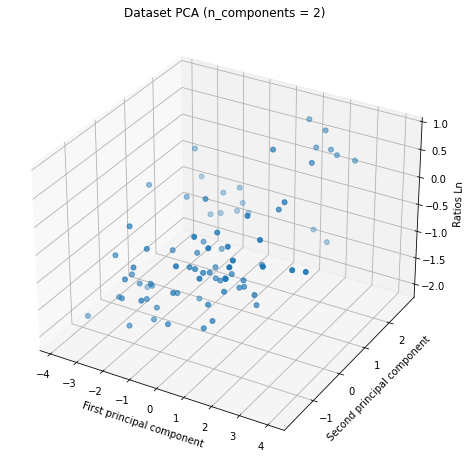

In [57]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1],y,s=25)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Ratios Ln')
plt.title('Dataset PCA (n_components = 2)')
plt.show()

Number of potential outliers : 0 (0 %)

# DBSCAN clustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [58]:
from sklearn.cluster import DBSCAN

In [60]:
dbscan = DBSCAN(eps =9, min_samples = 1)

cls_findOutlier = dbscan.fit_predict(X_normalized)

print("Cluster membership values:\n{}".format(cls_findOutlier))



Cluster membership values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [53]:
unique, counts = np.unique(cls_findOutlier, return_counts=True)
dict(zip(unique, counts))

{0: 4, 1: 75, 2: 1, 3: 1, 4: 1, 5: 1}

### We tested with different values of "eps" and "min_samples", no 'Cluster membership values' equals -1. 
### Therefore, no outliers need to be removed.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


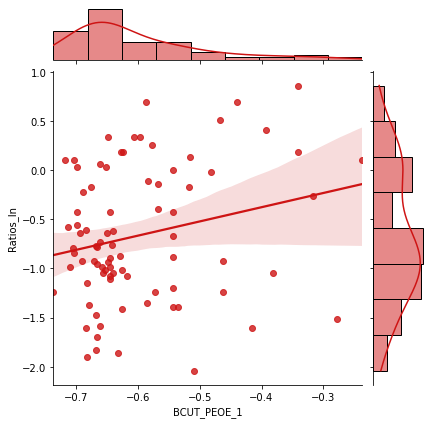

In [64]:
sns.jointplot(X.iloc[:,0],
              y,
              kind="reg",
              color="#ce1414")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


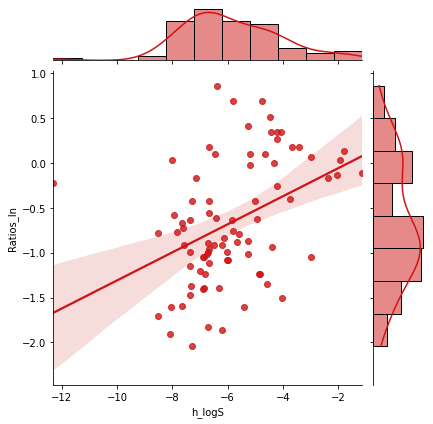

In [65]:
sns.jointplot(X.iloc[:,1],
              y,
              kind="reg",
              color="#ce1414")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


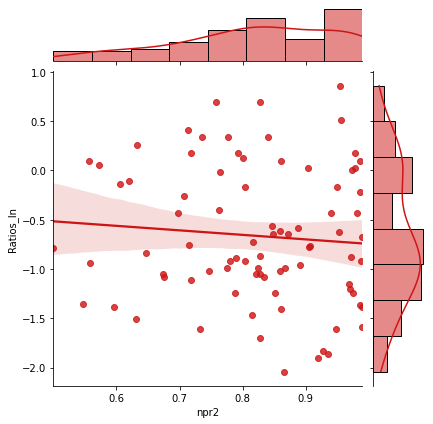

In [66]:
sns.jointplot(X.iloc[:,2],
              y,
              kind="reg",
              color="#ce1414")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


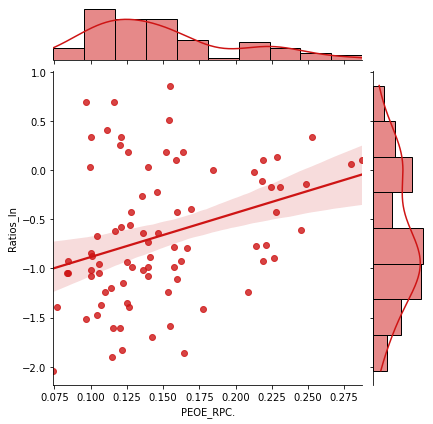

In [67]:
sns.jointplot(X.iloc[:,3],
              y,
              kind="reg",
              color="#ce1414")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


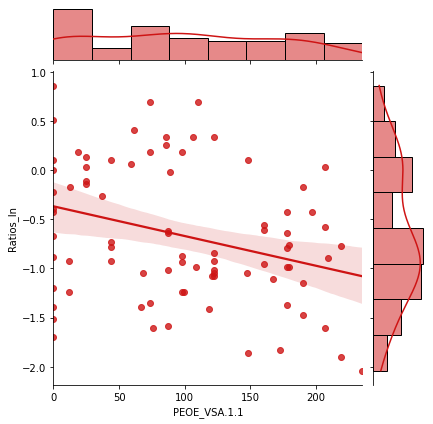

In [68]:
sns.jointplot(X.iloc[:,4],
              y,
              kind="reg",
              color="#ce1414")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


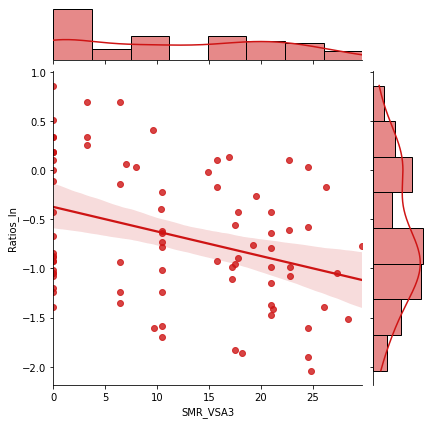

In [69]:
sns.jointplot(X.iloc[:,5],
              y,
              kind="reg",
              color="#ce1414")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


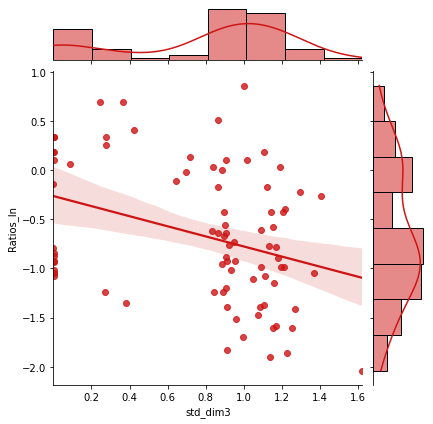

In [70]:
sns.jointplot(X.iloc[:,6],
              y,
              kind="reg",
              color="#ce1414")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


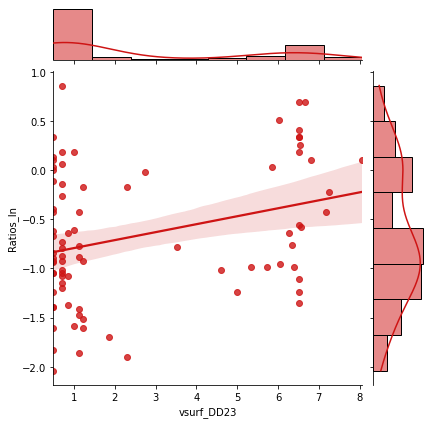

In [71]:
sns.jointplot(X.iloc[:,7],
              y,
              kind="reg",
              color="#ce1414")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


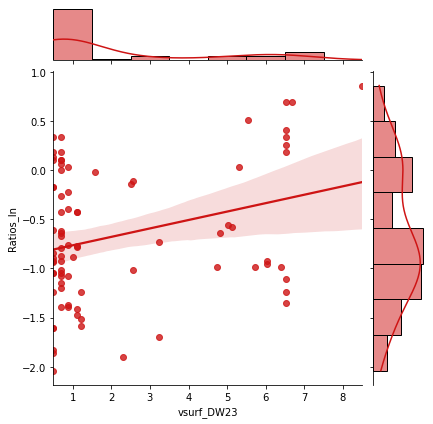

In [73]:
sns.jointplot(X.iloc[:,8],
              y,
              kind="reg",
              color="#ce1414")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


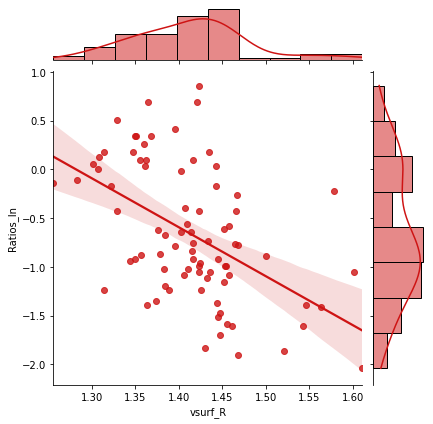

In [74]:
sns.jointplot(X.iloc[:,9],
              y,
              kind="reg",
              color="#ce1414")

# Model training

In [61]:
X_train.shape

(66, 10)

In [62]:
X_train.columns

Index(['BCUT_PEOE_1', 'h_logS', 'npr2', 'PEOE_RPC.', 'PEOE_VSA.1.1',
       'SMR_VSA3', 'std_dim3', 'vsurf_DD23', 'vsurf_DW23', 'vsurf_R'],
      dtype='object')

## Dummy ---------using Dummy as the baseline

In [75]:
from sklearn.dummy import DummyRegressor

In [76]:
dummy_regr = DummyRegressor(strategy="mean").fit(X_train, y_train)
print('R-squared test score for dummy: {:.3f}'
     .format(dummy_regr.score(X_train, y_train)))
print('R-squared test score for dommy: {:.3f}'
     .format(dummy_regr.score(X_test, y_test)))

R-squared test score for dummy: 0.000
R-squared test score for dommy: -0.034


## Decision Tree

In [77]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  

min_samples_list = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70]
train_score_list = []
test_score_list = []

# create a regressor object 
for this_min_samples in min_samples_list:
    regressor = DecisionTreeRegressor(min_samples_split = this_min_samples,random_state = 0).fit(X_train, y_train)
    train_score = regressor.score(X_train,y_train)
    test_score = regressor.score(X_test,y_test)
    train_score_list.append(train_score)
    test_score_list.append(test_score)

    print('min_samples_split = {}, \nr-squared training: {:.2f}, \nr-squared test: {:.2f}\n'
         .format(this_min_samples,train_score, test_score))

min_samples_split = 2, 
r-squared training: 1.00, 
r-squared test: -0.00

min_samples_split = 3, 
r-squared training: 0.98, 
r-squared test: -0.01

min_samples_split = 4, 
r-squared training: 0.98, 
r-squared test: 0.02

min_samples_split = 5, 
r-squared training: 0.97, 
r-squared test: 0.04

min_samples_split = 6, 
r-squared training: 0.96, 
r-squared test: 0.07

min_samples_split = 7, 
r-squared training: 0.94, 
r-squared test: 0.10

min_samples_split = 8, 
r-squared training: 0.93, 
r-squared test: 0.11

min_samples_split = 9, 
r-squared training: 0.91, 
r-squared test: 0.05

min_samples_split = 10, 
r-squared training: 0.88, 
r-squared test: 0.02

min_samples_split = 15, 
r-squared training: 0.72, 
r-squared test: 0.03

min_samples_split = 20, 
r-squared training: 0.59, 
r-squared test: 0.36

min_samples_split = 25, 
r-squared training: 0.59, 
r-squared test: 0.36

min_samples_split = 30, 
r-squared training: 0.59, 
r-squared test: 0.36

min_samples_split = 35, 
r-squared training:

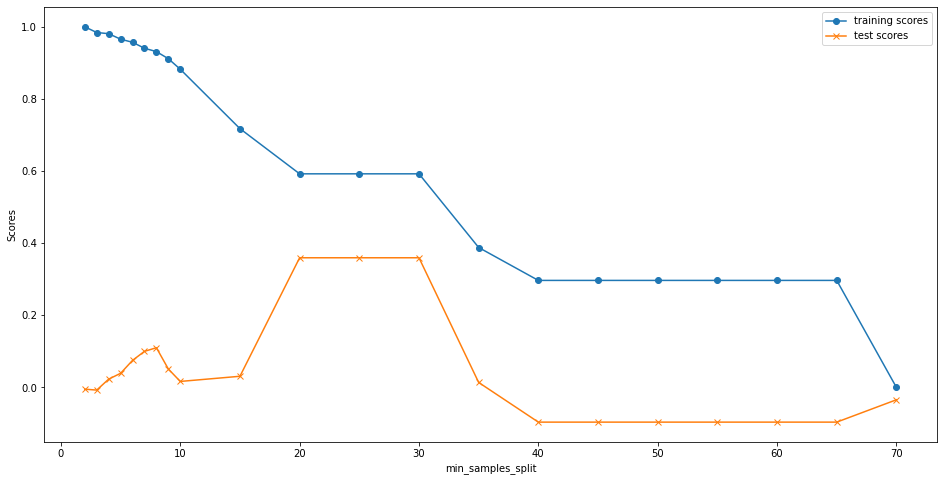

In [78]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(min_samples_list, train_score_list, '-o', label = "training scores")
plt.plot(min_samples_list, test_score_list, '-x',label ="test scores" )
plt.xlabel("min_samples_split")
plt.ylabel("Scores")
plt.legend()
plt.show()

In [79]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  

max_depth_list = [2,3,4,5,6,7,8]
train_score_list = []
test_score_list = []

# create a regressor object 
for this_max_depth in max_depth_list:
    regressor = DecisionTreeRegressor(max_depth = this_max_depth,random_state = 0).fit(X_train, y_train)
    train_score = regressor.score(X_train,y_train)
    test_score = regressor.score(X_test,y_test)
    train_score_list.append(train_score)
    test_score_list.append(test_score)

    print('max_depth = {}, \nr-squared training: {:.2f}, \nr-squared test: {:.2f}\n'
         .format(this_max_depth,train_score, test_score))

max_depth = 2, 
r-squared training: 0.45, 
r-squared test: 0.09

max_depth = 3, 
r-squared training: 0.67, 
r-squared test: 0.27

max_depth = 4, 
r-squared training: 0.81, 
r-squared test: -0.01

max_depth = 5, 
r-squared training: 0.90, 
r-squared test: 0.14

max_depth = 6, 
r-squared training: 0.96, 
r-squared test: 0.12

max_depth = 7, 
r-squared training: 0.99, 
r-squared test: 0.08

max_depth = 8, 
r-squared training: 1.00, 
r-squared test: 0.11



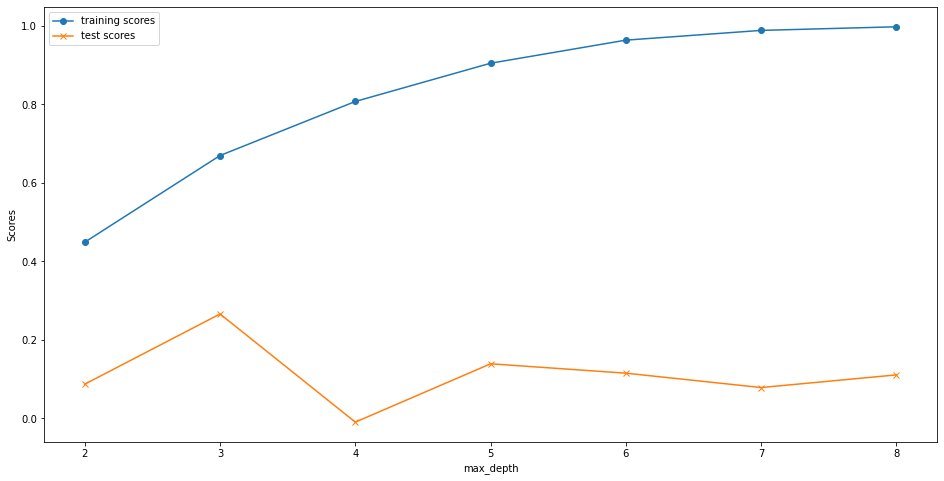

In [80]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(max_depth_list, train_score_list, '-o', label = "training scores")
plt.plot(max_depth_list, test_score_list, '-x',label ="test scores" )
plt.xlabel("max_depth")
plt.ylabel("Scores")
plt.legend()
plt.show()

### Cross-validation

In [88]:
from sklearn.model_selection import cross_val_score

min_samples_list = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,42,43,44,45]

cv_scores_mean = []

for this_min_samples in min_samples_list:
    regressor = DecisionTreeRegressor(min_samples_split = this_min_samples,random_state = 0)
    
    cv_scores = cross_val_score(regressor,X_train,y_train,cv=3,scoring ="r2")
    cv_scores_mean.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean

[-0.9467660216792186,
 -0.5608139380888285,
 -0.7213451024291532,
 -0.6404257562171873,
 -0.7158791323997878,
 -0.7156360046651532,
 -0.6676502422295744,
 -0.6676381226069301,
 -0.4589515209265605,
 -0.32591047838066883,
 -0.1070191803134685,
 0.03779805247386266,
 0.08067514504318311,
 0.10019332522677056,
 0.10019332522677056,
 0.10019332522677056,
 0.10019332522677056,
 0.10019332522677056,
 -0.026477050809976903]

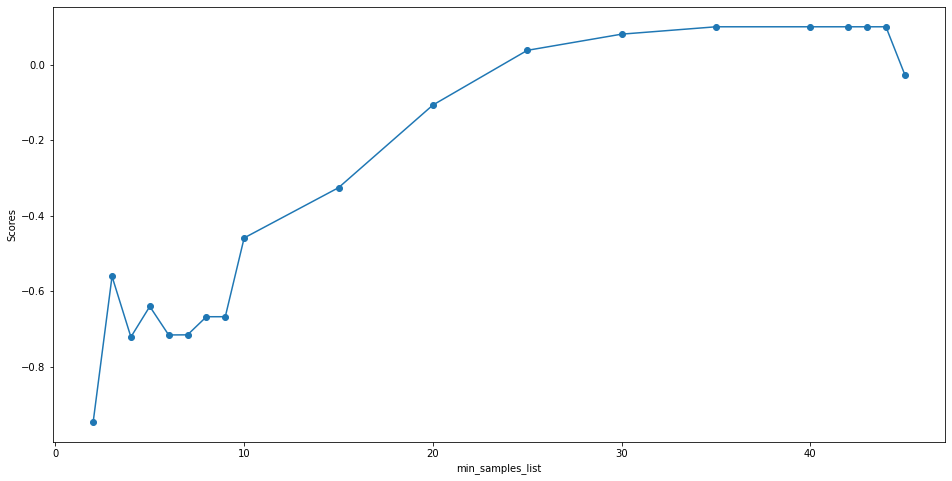

In [89]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(min_samples_list, cv_scores_mean, '-o')
plt.xlabel("min_samples_list")
plt.ylabel("Scores")
plt.show()

In [84]:
from sklearn.model_selection import cross_val_score

max_depth_list = [2,3,4,5,6,7,8]

cv_scores_mean = []

for this_max_depth in max_depth_list:
    regressor = DecisionTreeRegressor(max_depth = this_max_depth,random_state = 0)
    
    cv_scores = cross_val_score(regressor,X_train,y_train,cv=3,scoring ="r2")
    cv_scores_mean.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean

[-0.3057585067464594,
 -0.24185335498803737,
 -0.5888205805375479,
 -0.7557841334227254,
 -0.8367055049050895,
 -0.8619369442524727,
 -0.9258434080282923]

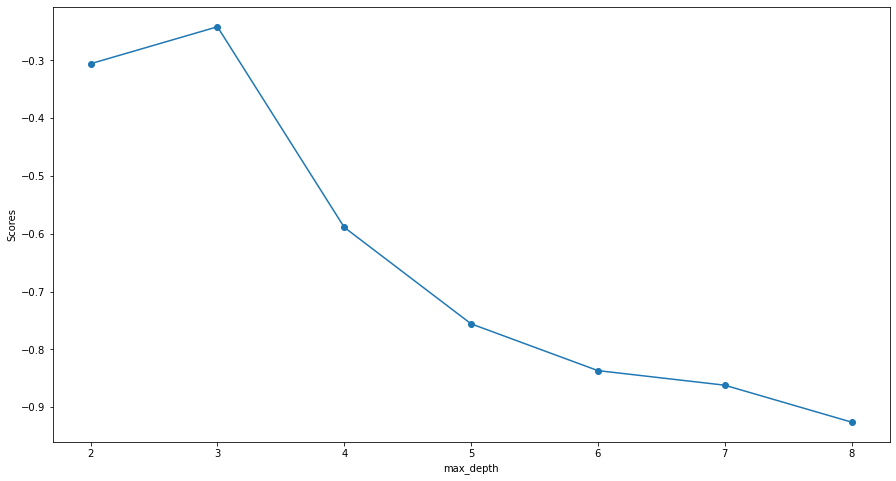

In [85]:
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.plot(max_depth_list, cv_scores_mean, '-o')
plt.xlabel("max_depth")
plt.ylabel("Scores")
plt.show()

## Using the parameters which have the best performance

In [101]:

from sklearn.tree import DecisionTreeRegressor  

# create a regressor object 

regressor = DecisionTreeRegressor(min_samples_split = 30,random_state = 0).fit(X_train, y_train)
train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)
    
print('r-squared training: {:.2f}, \nr-squared test: {:.2f}\n'
         .format(train_score, test_score))

r-squared training: 0.59, 
r-squared test: 0.36



## Random Forest

## Perform a grid search over the parameters 

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [117]:
regr = RandomForestRegressor()

grid_value = {'n_estimators': [10, 15,20,25],
              'max_depth':[2, 3, 4, 5, 6, 7, 8]}

grid_r2 = GridSearchCV(regr, param_grid = grid_value, scoring = "r2", cv = 3)
grid_r2.fit(X_train, y_train)
result = grid_r2.cv_results_
    
n_estimators10 = []
n_estimators15 =[]
n_estimators20 = []
n_estimators25 =[]
    
for m in [0,4,8,12,16,20,24]:
    n_estimators10.append(result["mean_test_score"][m])

    n_estimators15.append(result["mean_test_score"][m+1])

    n_estimators20.append(result["mean_test_score"][m+2])

    n_estimators25.append(result["mean_test_score"][m+3])
        
df_result = pd.DataFrame({"n_estimators10":n_estimators10, "n_estimators15":n_estimators15,
                          "n_estimators20":n_estimators20, "n_estimators25":n_estimators25}, 
                         index = ["max_depth 2", "max_depth 3","max_depth 4", "max_depth 5", "max_depth 6", "max_depth 7", "max_depth 8"] )
df_result

,n_estimators10,n_estimators15,n_estimators20,n_estimators25
max_depth 2,0.037649,0.221885,0.149450,0.204089
max_depth 3,0.026643,0.181187,0.185047,0.158555
max_depth 4,0.159201,0.137623,0.186637,0.208997
max_depth 5,0.164246,0.177249,0.188331,0.169201
max_depth 6,0.155521,0.118991,0.182547,0.143141
max_depth 7,0.195538,0.194118,0.128788,0.236892
max_depth 8,0.139632,0.155838,0.269737,0.202920


In [105]:
import seaborn as sns  # data visualization library

<AxesSubplot:>

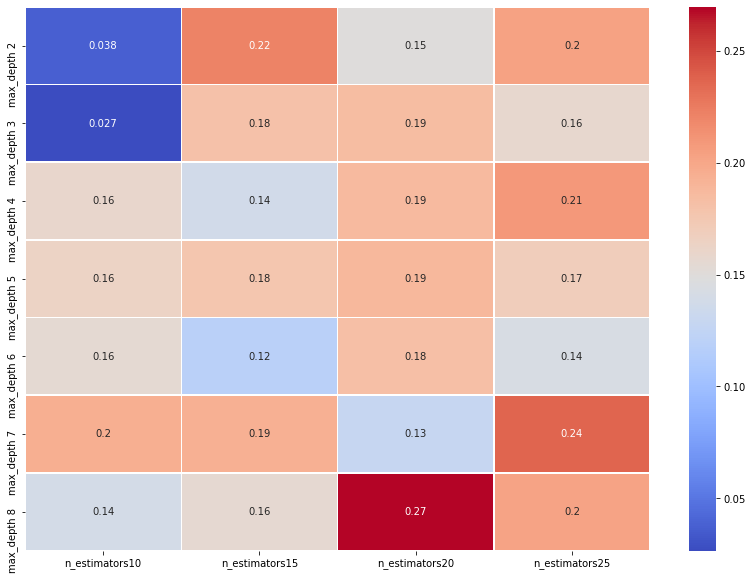

In [118]:
f, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(df_result, annot = True, linewidth = 0.5, ax=ax,cmap='coolwarm')

## Using the parameters which have the best performance

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
regr = RandomForestRegressor(max_depth=2, n_estimators = 15,random_state=0).fit(X_train, y_train)
train_score = regr.score(X_train,y_train)
test_score = regr.score(X_test,y_test)

print('r-squared training: {:.2f}, \nr-squared test: {:.2f}\n'
         .format(train_score, test_score))

r-squared training: 0.55, 
r-squared test: 0.16



# Linear models for regression

## Linear regression

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [125]:
linreg = LinearRegression().fit(X_train, y_train)
linreg_score_train = linreg.score(X_train, y_train)
linreg_score_test = linreg.score(X_test, y_test)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {}'.format(str(linreg.intercept_)))
print('R-squared score (training): {:.3f}'.format(linreg_score_train))
print('R-squared score (test): {:.3f}'.format(linreg_score_test))


linear model coeff (w): [ 1.11312910e+00  1.34026753e-01  2.38328402e+00  5.87694912e+00
 -1.59537434e-03  8.91670389e-03 -9.67069541e-01  8.70231153e-02
  3.88463016e-02  2.00366254e+00]
linear model intercept (b): -4.3429191719718325
R-squared score (training): 0.576
R-squared score (test): 0.109


### Cross-validation

In [130]:
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
cv_scores = cross_val_score(linreg,X_train,y_train,cv=5,scoring ="r2")
print("mean R-squared score", np.mean(cv_scores))
cv_scores

mean R-squared score 0.13469239822749018


array([-0.33770507, -0.1180888 , -0.06654417,  0.79346635,  0.40233368])

## Ridge regression with feature normalization

### Cross-validation

In [131]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

my_alpha1 =  [0, 0.01, 0.1, 0.25, 0.5, 1]
cv_scores_mean1 = []
for this_alpha in my_alpha1:
    linridge = Ridge(alpha=this_alpha, max_iter = 20000)
    cv_scores = cross_val_score(linridge,X_train_scaled,y_train,cv=5,scoring ="r2")
    cv_scores_mean1.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean1

[0.13469239822748857,
 0.14618890161175616,
 0.1946256407893,
 0.22030729487410353,
 0.23657340899552542,
 0.2450241072501162]

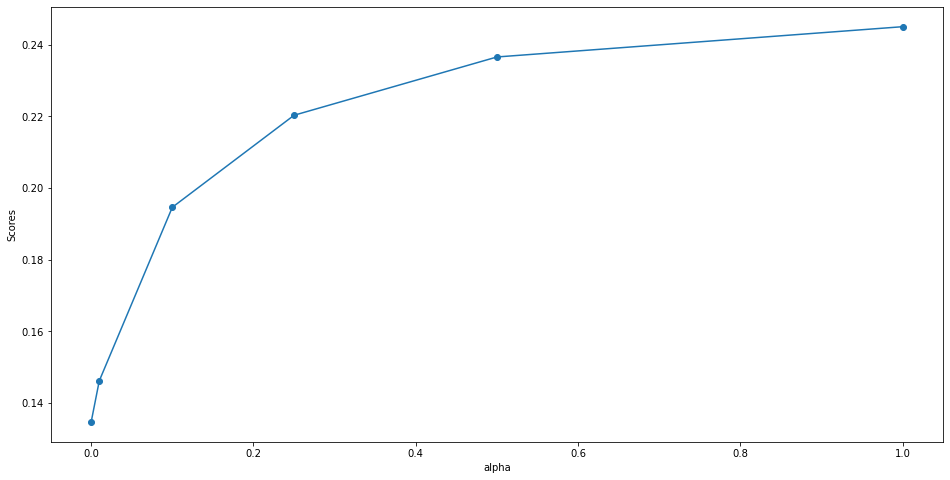

In [132]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(my_alpha1, cv_scores_mean1, '-o')
plt.xlabel("alpha")
plt.ylabel("Scores")
plt.show()

In [135]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

my_alpha2 =  [1,1.5,2,3,4, 5, 5.5, 5.7, 6,7,8]
cv_scores_mean2 = []
for this_alpha in my_alpha2:
    linridge = Ridge(alpha=this_alpha, max_iter = 20000)
    cv_scores = cross_val_score(linridge,X_train_scaled,y_train,cv=5,scoring ="r2")
    cv_scores_mean2.append(np.mean(cv_scores))
cv_scores_mean2

[0.2450241072501162,
 0.24385129470621097,
 0.23954791016689753,
 0.2279079329465869,
 0.21525514072093319,
 0.20269218804636582,
 0.19655883613841707,
 0.1941397569622576,
 0.1905502067726528,
 0.17894120447083633,
 0.167898000199561]

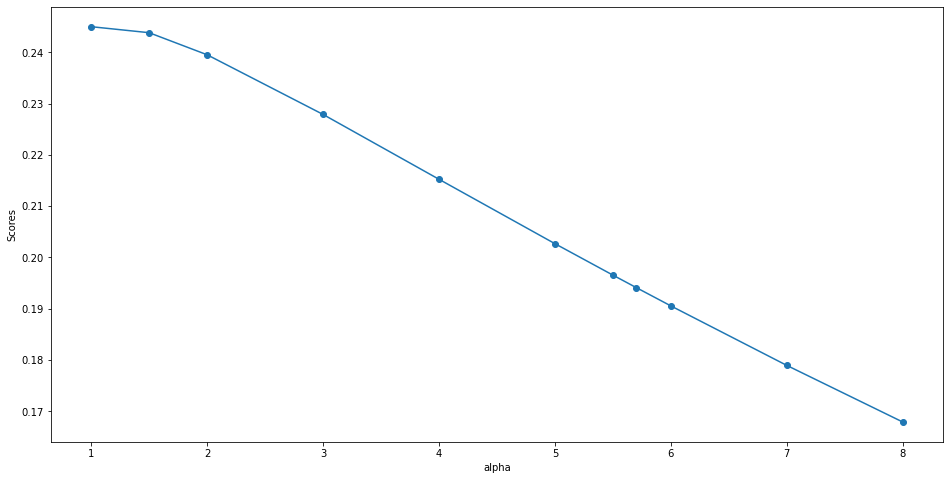

In [136]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(my_alpha2, cv_scores_mean2, '-o')
plt.xlabel("alpha")
plt.ylabel("Scores")
plt.show()

## Using the parameters which have the best performance

In [137]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=1, max_iter = 20000).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: -1.2051170402813873
ridge regression linear model coeff:
[ 0.44847433  0.5794696   0.34475469  0.69722573 -0.23472681 -0.10245364
 -0.58811779  0.55598609  0.21023633 -0.31385722]
R-squared score (training): 0.527
R-squared score (test): 0.260
Number of non-zero features: 10


## Lasso regression

## Cross-validation

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

my_alpha1 =  [0.0001, 0.001,0.002,0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
cv_scores_mean1 = []

for this_alpha in my_alpha1:
    lasso = Lasso(alpha = this_alpha, max_iter = 20000)
    cv_scores = cross_val_score(lasso,X_train_scaled,y_train,cv=5,scoring ="r2")
    cv_scores_mean1.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean1

[0.1396362068555051,
 0.1759109177257493,
 0.20030057981092203,
 0.20949170645820078,
 0.19989516350935516,
 0.1879297231587098,
 0.17319561615248544,
 0.15872987271655398,
 0.15077578165363728,
 0.084000894739478]

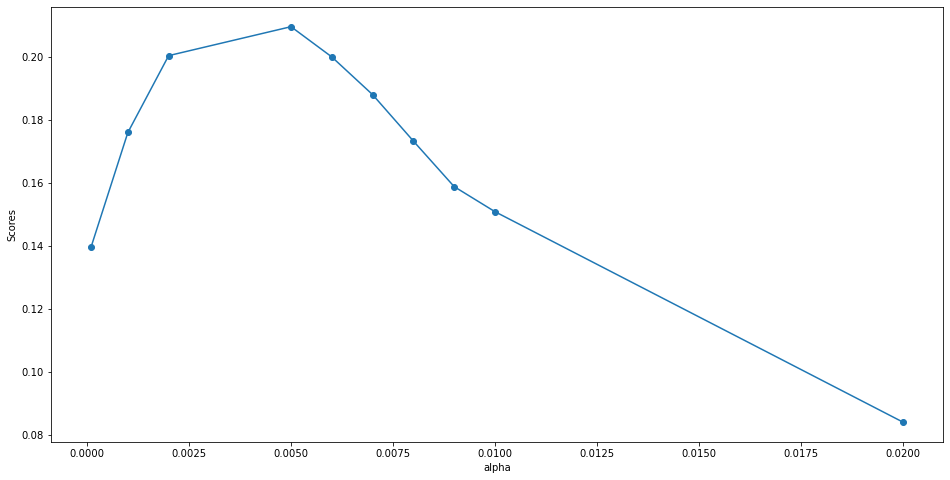

In [146]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(my_alpha1, cv_scores_mean1, '-o')
plt.xlabel("alpha")
plt.ylabel("Scores")
plt.show()

## Using the parameters which have the best performance

In [147]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=0.005, max_iter = 20000).fit(X_train_scaled, y_train)


print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train.columns), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: -1.6956841987357767
lasso regression linear model coeff:
[ 0.52087175  0.90338657  0.60533158  0.89808945 -0.22084834 -0.
 -0.91801141  0.62884136  0.17804481 -0.        ]
Non-zero features: 8
R-squared score (training): 0.555
R-squared score (test): 0.214

Features with non-zero weight (sorted by absolute magnitude):
	std_dim3, -0.918
	h_logS, 0.903
	PEOE_RPC., 0.898
	vsurf_DD23, 0.629
	npr2, 0.605
	BCUT_PEOE_1, 0.521
	PEOE_VSA.1.1, -0.221
	vsurf_DW23, 0.178


## ElasticNet
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [148]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [149]:
elastic = ElasticNet()

grid_value = {'l1_ratio': [0.1, 0.3,0.5,0.7,0.9],
              'alpha':[0.01, 0.02, 0.03, 0.05,0.07,0.08, 0.9]}


grid_r2 = GridSearchCV(elastic, param_grid = grid_value, scoring = "r2", cv = 3)
grid_r2.fit(X_train_scaled, y_train)
result = grid_r2.cv_results_

l1_ratio_01 = []
l1_ratio_03 = []
l1_ratio_05 = []
l1_ratio_07 = []
l1_ratio_09 = []
    
for m in [0,5,9,13,17,21,25]:
    l1_ratio_01.append(result["mean_test_score"][m])
    l1_ratio_03.append(result["mean_test_score"][m+1])
    l1_ratio_05.append(result["mean_test_score"][m+2])
    l1_ratio_07.append(result["mean_test_score"][m+3])
    l1_ratio_09.append(result["mean_test_score"][m+4])
        
df_result = pd.DataFrame({"l1_ratio_01":l1_ratio_01, "l1_ratio_03":l1_ratio_03,
                         "l1_ratio_05":l1_ratio_05,"l1_ratio_07":l1_ratio_07,"l1_ratio_09":l1_ratio_09}, 
                         index = ["alpha 0.01", "alpha 0.02","alpha 0.03","alpha 0.05", "alpha 0.07","alpha 0.08","alpha 0.09"] )
df_result

,l1_ratio_01,l1_ratio_03,l1_ratio_05,l1_ratio_07,l1_ratio_09
alpha 0.01,0.325187,0.319394,0.308581,0.291923,0.278029
alpha 0.02,0.316126,0.294649,0.268835,0.241396,0.214338
alpha 0.03,0.214338,0.305753,0.274390,0.239239,0.201358
alpha 0.05,0.201358,0.155919,0.285374,0.239425,0.179811
alpha 0.07,0.179811,0.103109,0.057354,0.264547,0.202080
alpha 0.08,0.202080,0.108763,0.041432,-0.012629,0.254742
alpha 0.09,0.254742,0.182271,0.078736,0.011778,-0.025143


In [150]:
import seaborn as sns  # data visualization library

<AxesSubplot:>

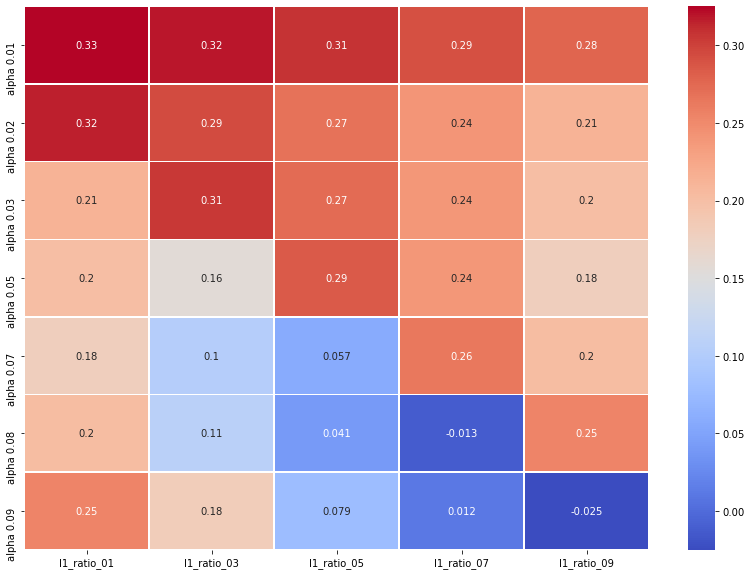

In [151]:
f, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(df_result, annot = True, linewidth = 0.5, ax=ax,cmap='coolwarm')

## Using the parameters which have the best performance

In [156]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic = ElasticNet(l1_ratio = 0.01, alpha = 0.01, random_state=0).fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'
     .format(elastic.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(elastic.score(X_test_scaled, y_test)))


R-squared score (training): 0.541
R-squared score (test): 0.245


## Partial least squares

### Cross Validation

In [157]:
from sklearn.cross_decomposition import PLSRegression

In [158]:
my_n_component =  [2,3,4,5,6]
cv_scores_mean = []

for this_n in my_n_component:
    plsReg = PLSRegression(n_components=this_n)
    cv_scores = cross_val_score(plsReg,X_train,y_train,cv=5,scoring ="r2")
    cv_scores_mean.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean

[0.20352296080862411,
 0.172426736735932,
 0.15128388213910698,
 0.16658690202273904,
 0.14157901354562438]

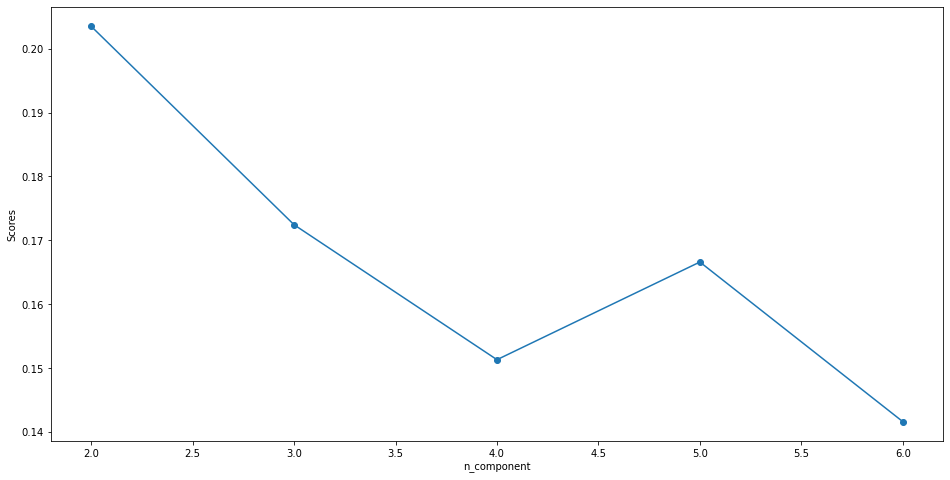

In [159]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(my_n_component, cv_scores_mean, '-o')
plt.xlabel("n_component")
plt.ylabel("Scores")
plt.show()

## Using the parameters which have the best performance

In [160]:
plsReg = PLSRegression(n_components=2).fit(X_train,y_train)

print('R-squared score (training): {:.3f}'
     .format(plsReg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(plsReg.score(X_test, y_test)))

R-squared score (training): 0.506
R-squared score (test): 0.260


## Polynomial regression

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [162]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [163]:
myDegrees = [1,2,3,4]

r2_train = np.zeros((4,))
r2_test = np.zeros((4,))

for i in range(len(myDegrees)):
    poly = PolynomialFeatures(degree = myDegrees[i])      
    X_train_poly = poly.fit_transform(X_train_scaled)
    reg = LinearRegression().fit(X_train_poly, y_train)
    
    X_test_ploy = poly.fit_transform(X_test_scaled)                        
    r2_test[i] =  reg.score(X_test_ploy, y_test)
             
    r2_train[i] = reg.score(X_train_poly, y_train)

df_score = pd.DataFrame({"Training Scores": list(r2_train),
                        "Test Scores": list(r2_test)}, index = myDegrees)
    
df_score

,Training Scores,Test Scores
1,0.57553,0.108976
2,1.00000,-5055.128178
3,1.00000,-4.197388
4,1.00000,-3.528521


### Conclusion: Polynomial regression model did not performe well (overfitting).

## Neural networks: Regression

In [164]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Try 1 hidden layer with 2 hidden unit

In [165]:
r2_train = []
r2_test = []
param = []

for thisactivation in ['tanh', 'relu']:
    for thisalpha in [0.1, 1.0, 2.0, 5.0, 6.0, 7.0, 8.0, 9.0,10]:
        mlpreg = MLPRegressor(hidden_layer_sizes = [2],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs',
                              max_iter = 20000).fit(X_train_scaled, y_train)
        train_score = mlpreg.score(X_train_scaled,y_train)
        test_score =  mlpreg.score(X_test_scaled,y_test)
        r2_train.append(train_score)
        r2_test.append(test_score)
        param.append(thisactivation+str(thisalpha))

tanh_list_train = r2_train[0:9]
tanh_list_test = r2_test[0:9]
relu_list_train = r2_train[9:]
relu_list_test = r2_test[9:]    

df_result = pd.DataFrame({"train scores (tanh) ":tanh_list_train, "test score (tanh)":tanh_list_test,
                          "train scores (relu) ":relu_list_train, "test score (relu)":relu_list_test}, 
                         index = ["alpha 0.1","alpha 1.0","alpha 2.0","alpha 5.0","alpha 6.0","alpha 7.0","alpha 8.0","alpha 9.0", "alpha 10.0"] )
df_result

,train scores (tanh),test score (tanh),train scores (relu),test score (relu)
alpha 0.1,0.697522,0.042313,-4.210316e-09,-0.034289
alpha 1.0,0.548455,0.254880,5.430800e-01,0.240899
alpha 2.0,0.505675,0.281408,-1.238216e-08,-0.034365
alpha 5.0,0.375425,0.232645,-8.431735e-10,-0.034329
alpha 6.0,0.350714,0.211573,3.697592e-01,0.219725
alpha 7.0,0.291009,0.172541,3.305965e-01,0.193848
alpha 8.0,0.247749,0.141522,2.884993e-01,0.165436
alpha 9.0,0.221576,0.121375,2.435239e-01,0.134816
alpha 10.0,0.159056,0.078231,1.951687e-01,0.101687


<AxesSubplot:>

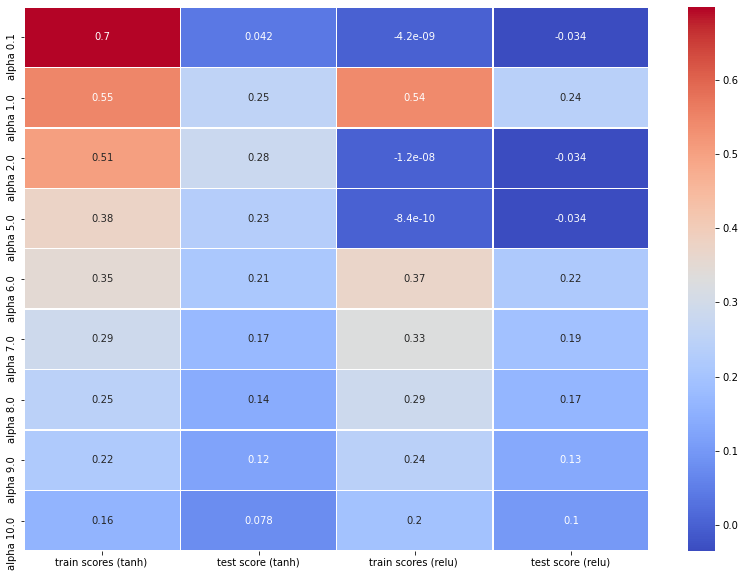

In [166]:
f, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(df_result, annot = True, linewidth = 0.5, ax=ax,cmap='coolwarm')

## Try 1 hidden layer with 3 hidden unit

In [167]:
r2_train = []
r2_test = []
param = []

for thisactivation in ['tanh', 'relu']:
    for thisalpha in [0.1, 1.0, 2.0, 5.0, 6.0, 7.0, 8.0, 9.0,10]:
        mlpreg = MLPRegressor(hidden_layer_sizes = [3],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs',
                              max_iter = 20000).fit(X_train_scaled, y_train)
        train_score = mlpreg.score(X_train_scaled,y_train)
        test_score =  mlpreg.score(X_test_scaled,y_test)
        r2_train.append(train_score)
        r2_test.append(test_score)
        param.append(thisactivation+str(thisalpha))

tanh_list_train = r2_train[0:9]
tanh_list_test = r2_test[0:9]
relu_list_train = r2_train[9:]
relu_list_test = r2_test[9:]    

df_result = pd.DataFrame({"train scores (tanh) ":tanh_list_train, "test score (tanh)":tanh_list_test,
                          "train scores (relu) ":relu_list_train, "test score (relu)":relu_list_test}, 
                         index = ["alpha 0.1","alpha 1.0","alpha 2.0","alpha 5.0","alpha 6.0","alpha 7.0","alpha 8.0","alpha 9.0", "alpha 10.0"] )
df_result

,train scores (tanh),test score (tanh),train scores (relu),test score (relu)
alpha 0.1,0.743512,-0.220608,5.553904e-01,0.148453
alpha 1.0,0.546563,0.247358,5.427916e-01,0.241729
alpha 2.0,0.506471,0.278988,5.128372e-01,0.256961
alpha 5.0,0.395909,0.240065,4.066180e-01,0.242912
alpha 6.0,0.350756,0.211606,-1.079120e-09,-0.034331
alpha 7.0,0.315941,0.186472,3.305351e-01,0.193818
alpha 8.0,0.273447,0.156888,2.888860e-01,0.165790
alpha 9.0,0.221876,0.121590,-2.360224e-09,-0.034338
alpha 10.0,0.175262,0.088957,1.906039e-01,0.093415


<AxesSubplot:>

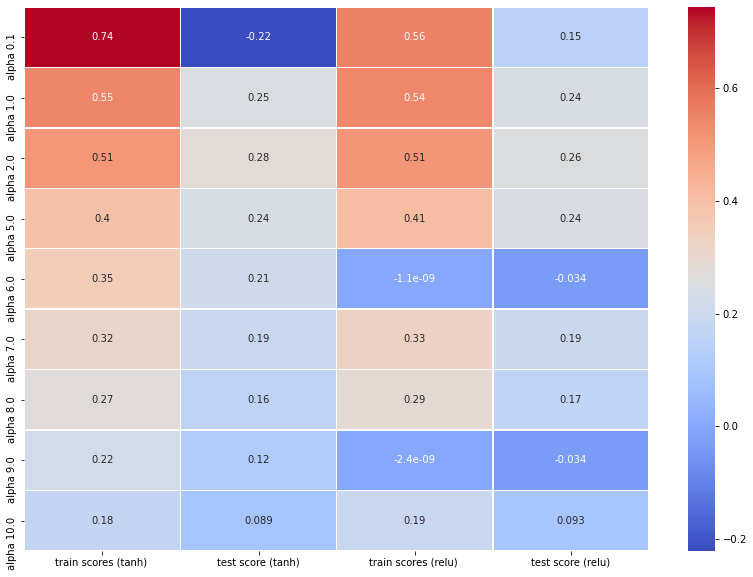

In [168]:
f, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(df_result, annot = True, linewidth = 0.5, ax=ax,cmap='coolwarm')

# K-Nearest Neighbors --------Regression

## Cross validation

In [169]:
from sklearn.neighbors import KNeighborsRegressor

In [170]:

my_k = [1,2,3,4,5,6,7,8,9,10]
cv_scores_mean = []

for this_k in my_k:
    knnreg = KNeighborsRegressor(n_neighbors = this_k).fit(X_train, y_train)
    cv_scores = cross_val_score(knnreg,X_train,y_train,cv=5,scoring ="r2")
    cv_scores_mean.append(np.mean(cv_scores))

#print("mean R-squared score", np.mean(cv_scores))
cv_scores_mean

[-0.3138558340371299,
 -0.08868986169596912,
 -0.27981805217479083,
 -0.2923227656210306,
 -0.19892703624508137,
 -0.23981850154577078,
 -0.220304853114554,
 -0.2226140978143793,
 -0.18901555516312532,
 -0.16917247291583423]

## View the performance of test dataset

In [171]:
for k in [1,2,3,15,25,35]:
    knnreg = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    score_train = knnreg.score(X_train, y_train)
    score_test = knnreg.score(X_test, y_test)
    print('K = ' +str(k))
    print('R-squared train score: {:.3f}'
         .format(score_train))
    print('R-squared test score: {:.3f}'
         .format(score_test))

K = 1
R-squared train score: 1.000
R-squared test score: -0.414
K = 2
R-squared train score: 0.668
R-squared test score: -0.028
K = 3
R-squared train score: 0.540
R-squared test score: 0.105
K = 15
R-squared train score: 0.119
R-squared test score: 0.004
K = 25
R-squared train score: 0.134
R-squared test score: 0.021
K = 35
R-squared train score: 0.101
R-squared test score: 0.021


In [172]:
X_train.to_csv('X_train_Selection006.csv')

In [173]:
X_test.to_csv('X_test_Selection006.csv')

In [174]:
y_train.to_csv('y_train_Selection006.csv')

In [175]:
y_test.to_csv('y_test_Selection006.csv')